# BodyIQ: Predicting Obesity Levels Through Lifestyle Insights

In [2]:
import numpy as np               # For numerical operations
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns            # For enhanced visualization
from sklearn.preprocessing import label_binarize
from sklearn import datasets      # For loading datasets
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler,MinMaxScaler    # For feature scaling
from sklearn.svm import SVC      # For Support Vector Machine
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification





## 1) Data Cleaning

### 1.1) Basic Statistics

In [3]:
#loading data
data = pd.read_csv("ObesityDataSet.csv")
data.head(15)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female  21.0    1.62    64.0                            yes   no   2.0   
1   Female  21.0    1.52    56.0                            yes   no   3.0   
2     Male  23.0    1.80    77.0                            yes   no   2.0   
3     Male  27.0    1.80    87.0                             no   no   3.0   
4     Male  22.0    1.78    89.8                             no   no   2.0   
5     Male  29.0    1.62    53.0                             no  yes   2.0   
6   Female  23.0    1.50    55.0                            yes  yes   3.0   
7     Male  22.0    1.64    53.0                             no   no   2.0   
8     Male  24.0    1.78    64.0                            yes  yes   3.0   
9     Male  22.0    1.72    68.0                            yes  yes   2.0   
10    Male  26.0    1.85   105.0                            yes  yes   3.0   
11  Female  21.0    1.72    80.0                            yes  yes   2.0   
12    Male  22.0    1.65    56.0                             no   no   3.0   
13    Male  41.0    1.80    99.0                             no  yes   2.0   
14    Male  23.0    1.77    60.0                            yes  yes   3.0   

    NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   3.0   Sometimes    no   2.0   no  0.0  1.0          no   
1   3.0   Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   3.0   Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5   3.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6   3.0   Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7   3.0   Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8   3.0   Sometimes    no   2.0   no  1.0  1.0  Frequently   
9   3.0   Sometimes    no   2.0   no  1.0  1.0          no   
10  3.0  Frequently    no   3.0   no  2.0  2.0   Sometimes   
11  3.0  Frequently    no   2.0  yes  2.0  1.0   Sometimes   
12  3.0   Sometimes    no   3.0   no  2.0  0.0   Sometimes   
13  3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
14  1.0   Sometimes    no   1.0   no  1.0  1.0   Sometimes   

                   MTRANS           NObeyesdad  
0   Public_Transportation        Normal_Weight  
1   Public_Transportation        Normal_Weight  
2   Public_Transportation        Normal_Weight  
3                 Walking   Overweight_Level_I  
4   Public_Transportation  Overweight_Level_II  
5              Automobile        Normal_Weight  
6               Motorbike        Normal_Weight  
7   Public_Transportation        Normal_Weight  
8   Public_Transportation        Normal_Weight  
9   Public_Transportation        Normal_Weight  
10  Public_Transportation       Obesity_Type_I  
11  Public_Transportation  Overweight_Level_II  
12  Public_Transportation        Normal_Weight  
13             Automobile       Obesity_Type_I  
14  Public_Transportation        Normal_Weight

In [4]:
# Display basic info
print("Basic Info:")
print(data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                   

In [5]:

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00000

### 1.2) Renaming Columns

In [6]:
#renaming feature coloumn for simplicity
data=data.rename(columns={"family_history_with_overweight": "FHWOW"})

In [7]:
#renaming target coloumn for simplicity
data=data.rename(columns={"NObeyesdad": "LevelStatus"})
data.head()

Gender   Age  Height  Weight FHWOW FAVC  FCVC  NCP       CAEC SMOKE  CH2O  \
0  Female  21.0    1.62    64.0   yes   no   2.0  3.0  Sometimes    no   2.0   
1  Female  21.0    1.52    56.0   yes   no   3.0  3.0  Sometimes   yes   3.0   
2    Male  23.0    1.80    77.0   yes   no   2.0  3.0  Sometimes    no   2.0   
3    Male  27.0    1.80    87.0    no   no   3.0  3.0  Sometimes    no   2.0   
4    Male  22.0    1.78    89.8    no   no   2.0  1.0  Sometimes    no   2.0   

   SCC  FAF  TUE        CALC                 MTRANS          LevelStatus  
0   no  0.0  1.0          no  Public_Transportation        Normal_Weight  
1  yes  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
2   no  2.0  1.0  Frequently  Public_Transportation        Normal_Weight  
3   no  2.0  0.0  Frequently                Walking   Overweight_Level_I  
4   no  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II

### 1.3)Handling Missing Values

In [8]:
# Check for missing values
# we can we see there are no missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Gender         0
Age            0
Height         0
Weight         0
FHWOW          0
FAVC           0
FCVC           0
NCP            0
CAEC           0
SMOKE          0
CH2O           0
SCC            0
FAF            0
TUE            0
CALC           0
MTRANS         0
LevelStatus    0
dtype: int64


In [9]:
# trying to fing duplicates rows, having them might make the model baised
duplicate_rows = data.duplicated()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Display duplicate rows if they exist
if duplicate_rows.sum() > 0:
    print("Duplicate Rows:")
    print(data[duplicate_rows])
   

Number of duplicate rows: 24
Duplicate Rows:
     Gender   Age  Height  Weight FHWOW FAVC  FCVC  NCP        CAEC SMOKE  \
98   Female  21.0    1.52    42.0    no   no   3.0  1.0  Frequently    no   
106  Female  25.0    1.57    55.0    no  yes   2.0  1.0   Sometimes    no   
174    Male  21.0    1.62    70.0    no  yes   2.0  1.0          no    no   
179    Male  21.0    1.62    70.0    no  yes   2.0  1.0          no    no   
184    Male  21.0    1.62    70.0    no  yes   2.0  1.0          no    no   
209  Female  22.0    1.69    65.0   yes  yes   2.0  3.0   Sometimes    no   
309  Female  16.0    1.66    58.0    no   no   2.0  1.0   Sometimes    no   
460  Female  18.0    1.62    55.0   yes  yes   2.0  3.0  Frequently    no   
467    Male  22.0    1.74    75.0   yes  yes   3.0  3.0  Frequently    no   
496    Male  18.0    1.72    53.0   yes  yes   2.0  3.0   Sometimes    no   
527  Female  21.0    1.52    42.0    no  yes   3.0  1.0  Frequently    no   
659  Female  21.0    1.52    42

In [10]:
print(f"Original dataset shape: {data.shape}")
# Remove 24 duplicate rows
data = data.drop_duplicates()

Original dataset shape: (2111, 17)


In [11]:
# shape of the dataset ater the removing duplicate rows
print(f"Cleaned dataset shape: {data.shape}")

Cleaned dataset shape: (2087, 17)


In [12]:

# Calculating Distribution of the target variable (Status)
# Motto is so check whether the dataset is balanced or unbalanced dataset
# It seems our dataset is slightly unbalanced
print("\nDistribution of Target Variable (Status):")
print(data['LevelStatus'].value_counts())




Distribution of Target Variable (Status):
LevelStatus
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


In [13]:
# all differnt classes in target features
levels=["Obesity_Type_I","Obesity_Type_III","Obesity_Type_II","Overweight_Level_I","Overweight_Level_II","Normal_Weight","Insufficient_Weight"]

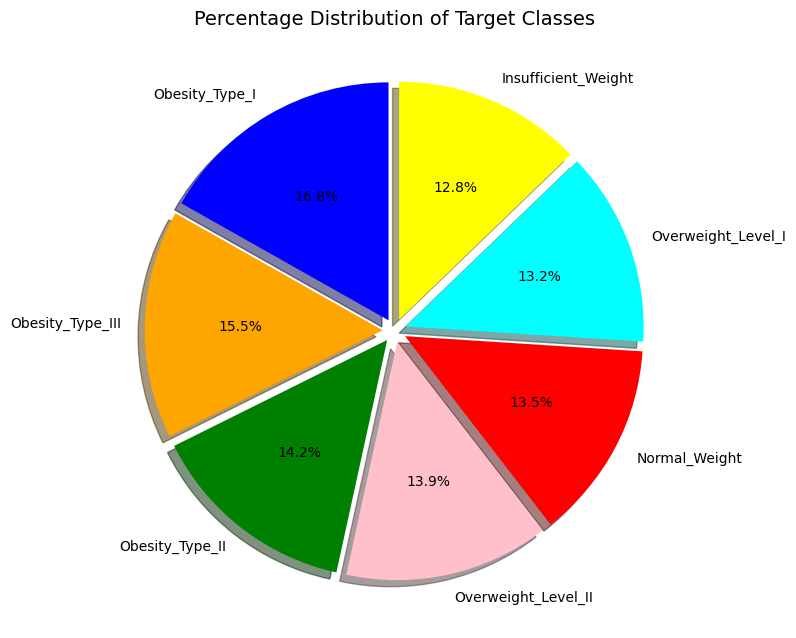

In [14]:
# Visualizing the distribution through plot
class_distribution = data['LevelStatus'].value_counts(normalize=True) * 100
# Plotting the pie chart
plt.figure(figsize=(8, 8))
class_distribution.plot.pie(autopct='%.1f%%', colors=['blue', 'orange', 'green', 'pink', 'red', 'cyan', 'yellow'],
                            startangle=90, explode=[0.05]*len(class_distribution), shadow=True)
# Adding titles
plt.title('Percentage Distribution of Target Classes', fontsize=14)
plt.ylabel('')  # Removing the y-label (optional)

plt.tight_layout()
plt.show()

###  1.4) Outliers Identification and Handling 

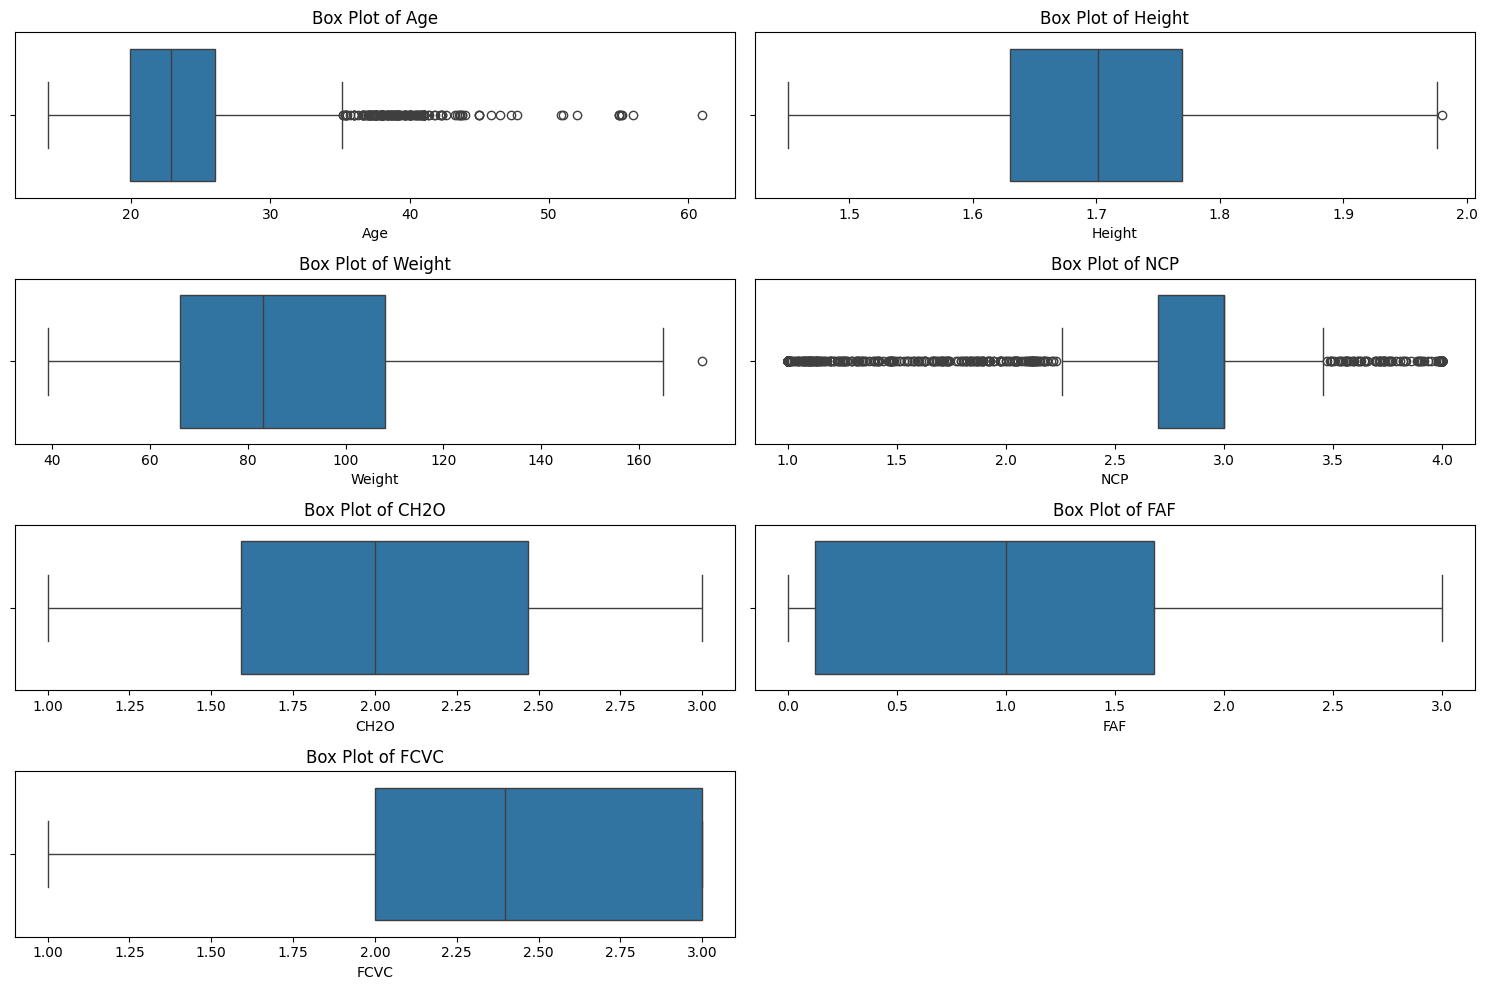

In [15]:
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create box plots for each numerical feature
for i, feature in enumerate(continuous_features):
    plt.subplot(4, 2, i + 1)  # Adjust the grid size (3 rows, 2 columns) as needed
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### As you can see we found some outliers in Age and NCP(main meals per day) but we cannot remove them because represent valid and meaningful observations rather than data entry errors:
#### i) Age Diversity: In an obesity-related dataset, age diversity could represent different life stages and their associated lifestyle or health behaviors. For example, older individuals may have different dietary and exercise patterns compared to younger ones, which could be relevant for classifying obesity levels. Removing age outliers might reduce the model's ability to generalize across age groups.

#### ii) Variability in Eating Habits (NCP): The number of times a person eats per day can vary widely based on personal, cultural, and health-related factors. Extreme values in NCP may reflect genuine eating patterns that contribute to obesity. Removing these could ignore important behaviors that might help differentiate obesity types.

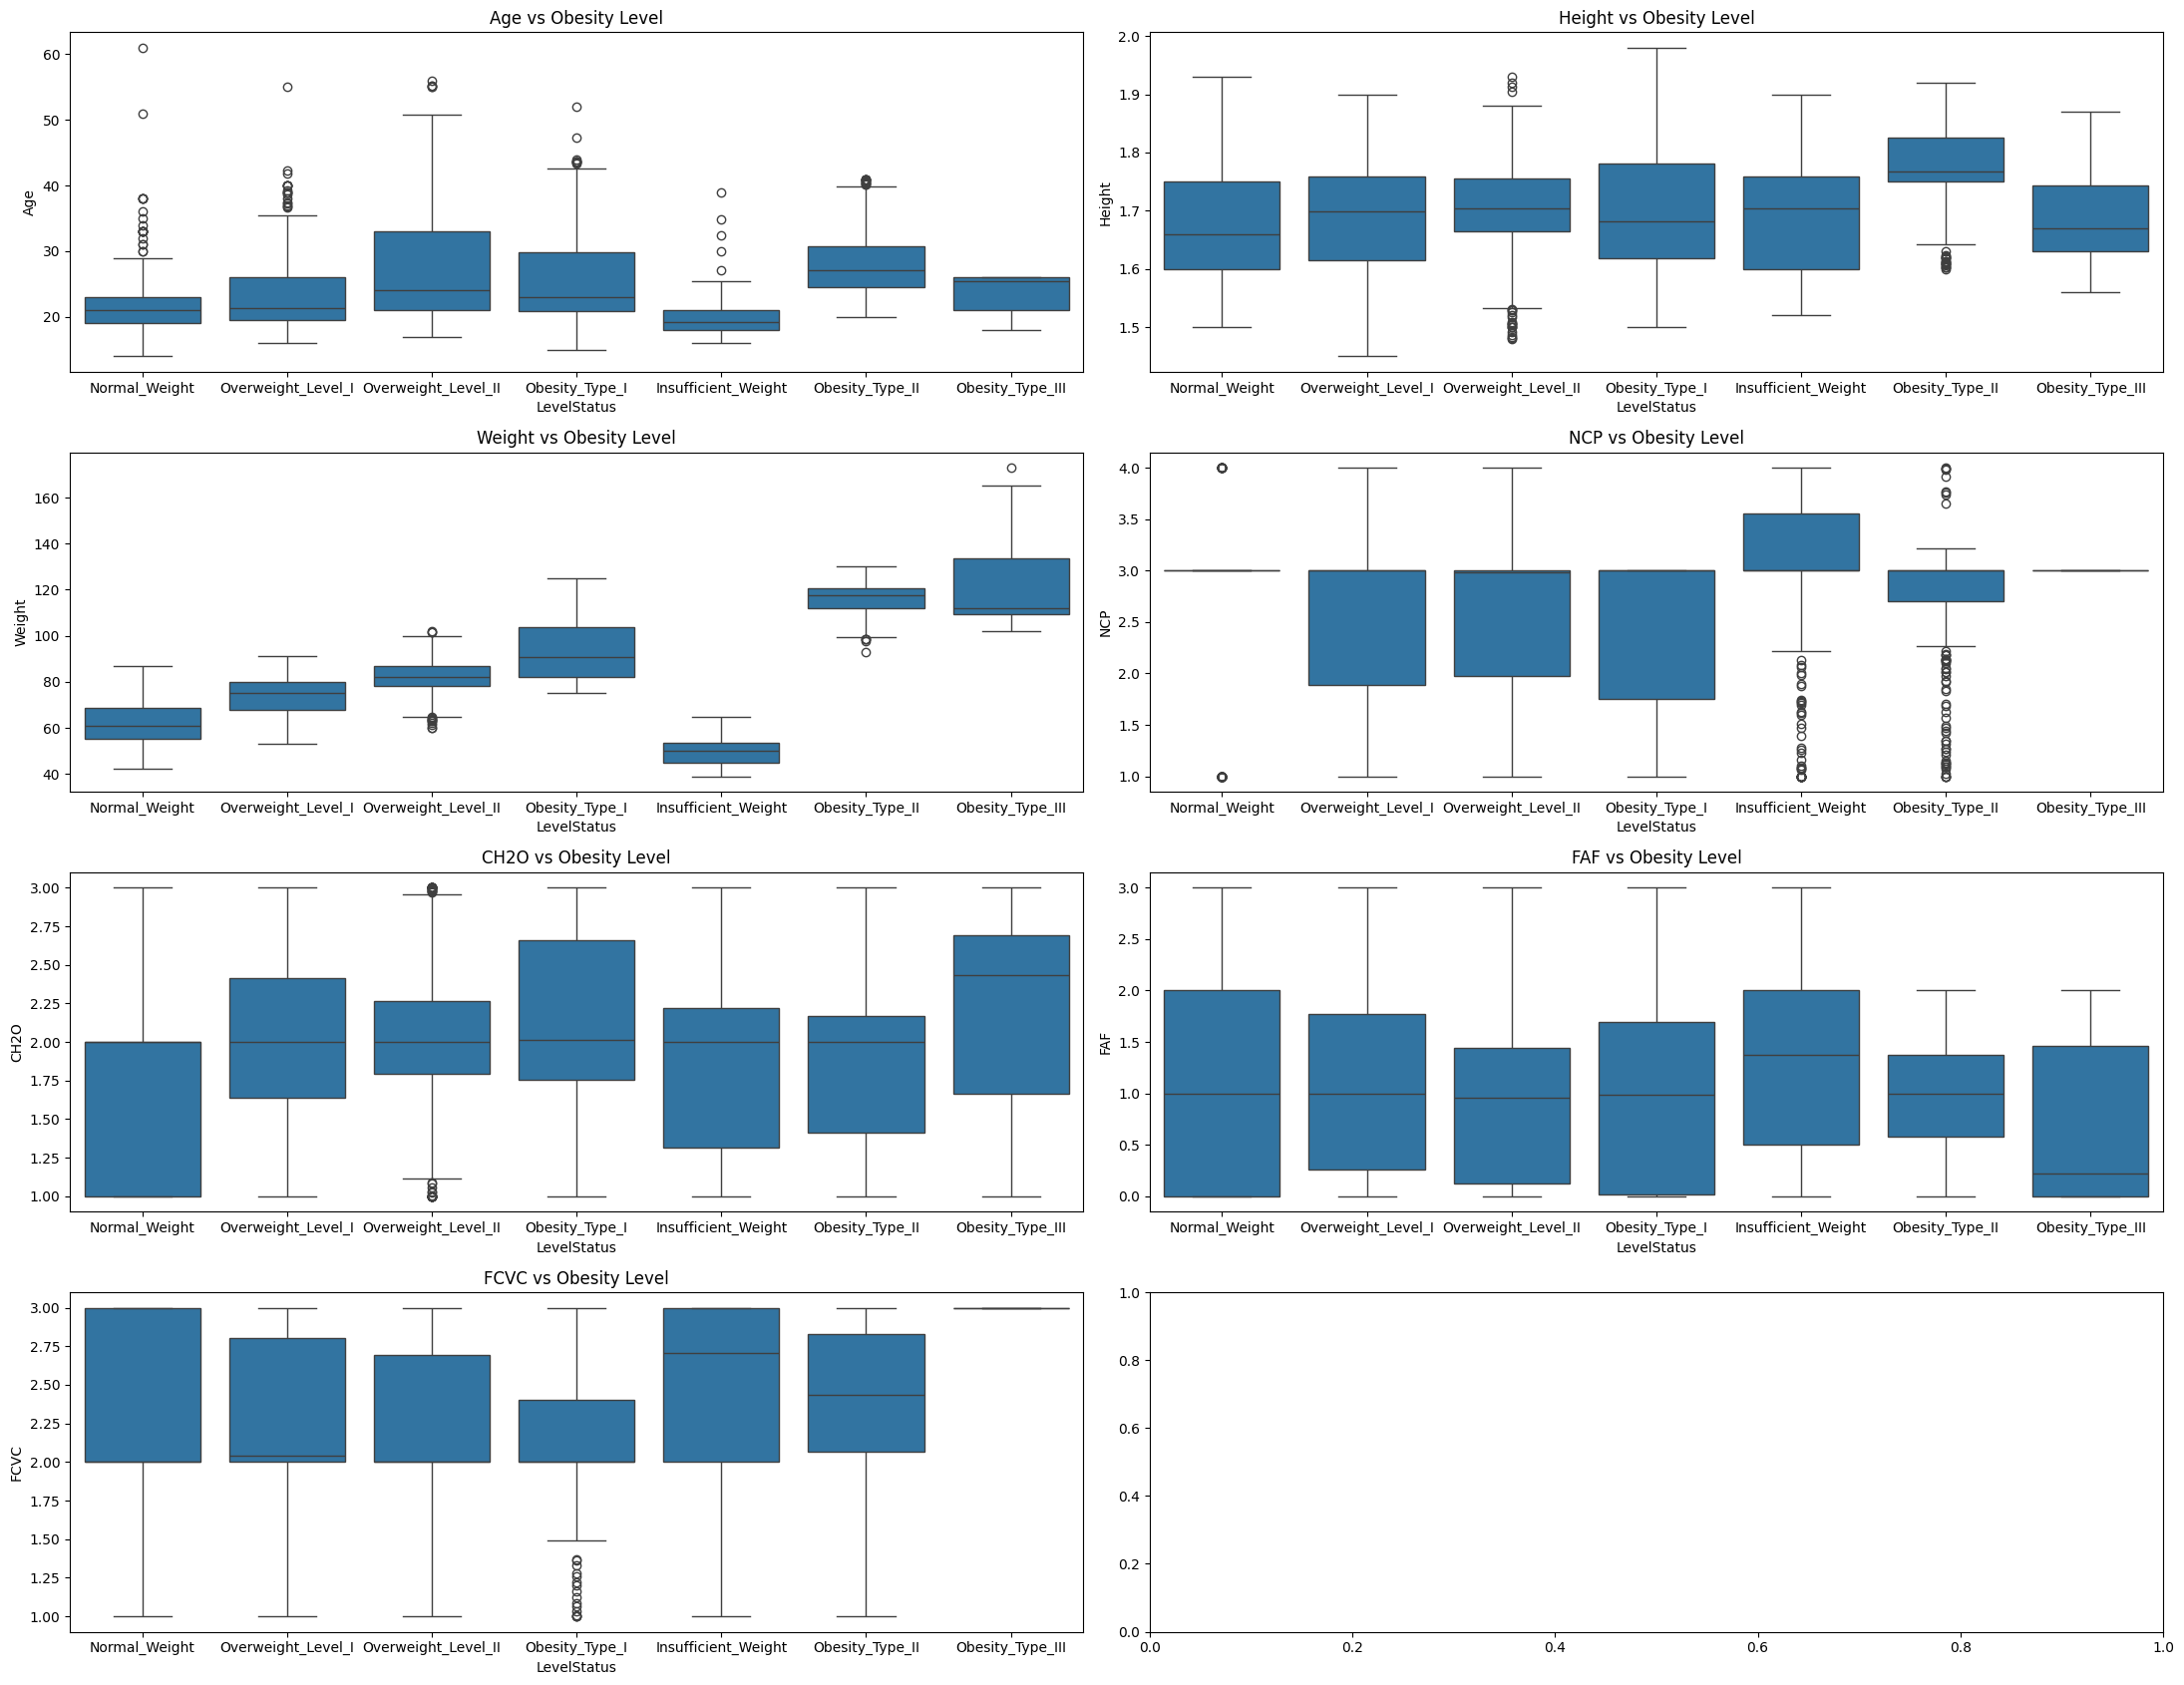

In [16]:
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']
fig, axes = plt.subplots(4, 2, figsize=(22, 17))
axes = axes.flatten()

# Plot box plots for continuous features against categorical target
for i, feature in enumerate(continuous_features):
    sns.boxplot(x=data['LevelStatus'], y=data[feature], ax=axes[i])
    axes[i].set_title(f'{feature} vs Obesity Level')

plt.tight_layout()
plt.show()

# 2) Data Preprocessing

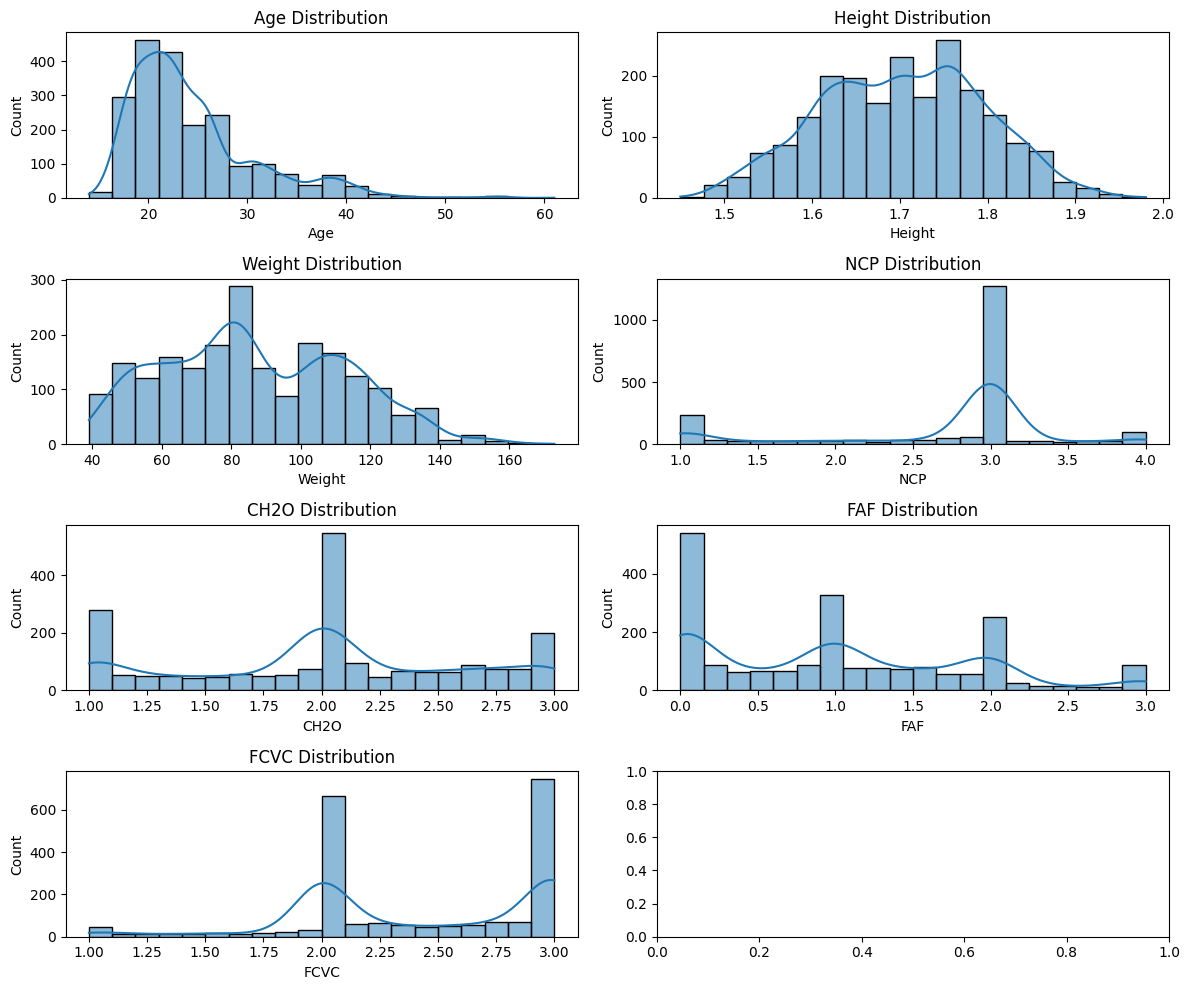

In [17]:
# List of continuous features
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, feature in enumerate(continuous_features):
    sns.histplot(data[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


### 2.1) Scaling numerical data features for a proper data format that avoid models become more complex and more generalize the dataset

In [18]:
# trying to Scaling
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

### 2.2) Checking for level of skewness in numerical data features

In [19]:
skewed_feats = data[continuous_features].apply(lambda x: x.skew())
print(skewed_feats)

Age       1.514305
Height   -0.024743
Weight    0.241902
NCP      -1.138264
CH2O     -0.106330
FAF       0.494320
FCVC     -0.448201
dtype: float64


####	i. "Mildly Positive Skewed: 0 < Skewness ≤ 0.5"
####	ii. "Moderately Positive Skewed: 0.5 < Skewness ≤ 1"
####	iii. "Highly Positive Skewed: Skewness > 1"

#### As you can  see "Age" and "NCP" are heavily skewed.

In [20]:
# handling skewed features 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data[['Age', 'NCP']] = pt.fit_transform(data[['Age', 'NCP']])



In [21]:
# checking results
skewed_feats = data[continuous_features].apply(lambda x: x.skew())
print(skewed_feats)

Age       0.107181
Height   -0.024743
Weight    0.241902
NCP       0.303920
CH2O     -0.106330
FAF       0.494320
FCVC     -0.448201
dtype: float64


# 3) Data visulization

## 3.1) UniVariant Analysis

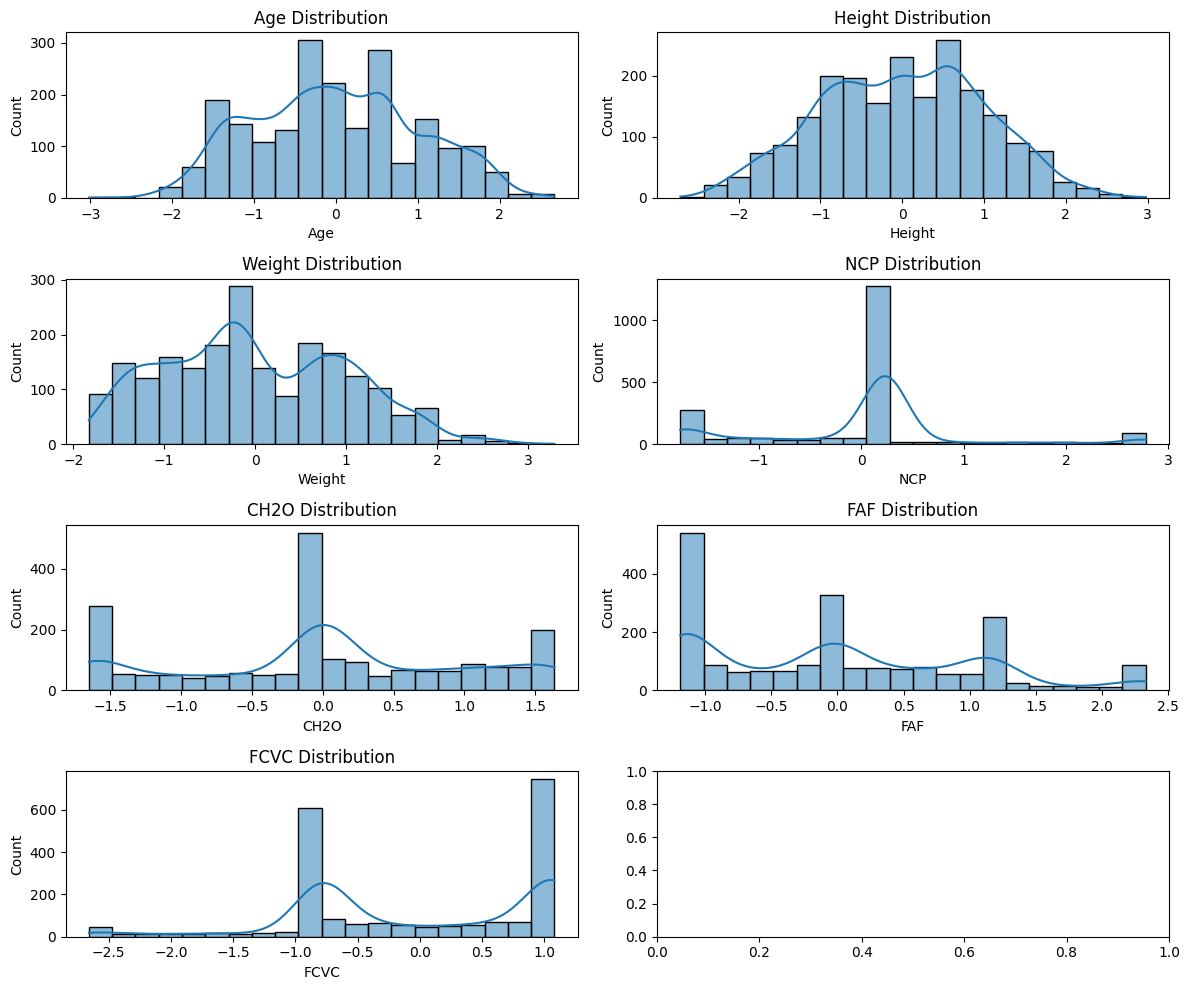

In [22]:
# Histogram for numerical features
# List of continuous features
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, feature in enumerate(continuous_features):
    sns.histplot(data[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


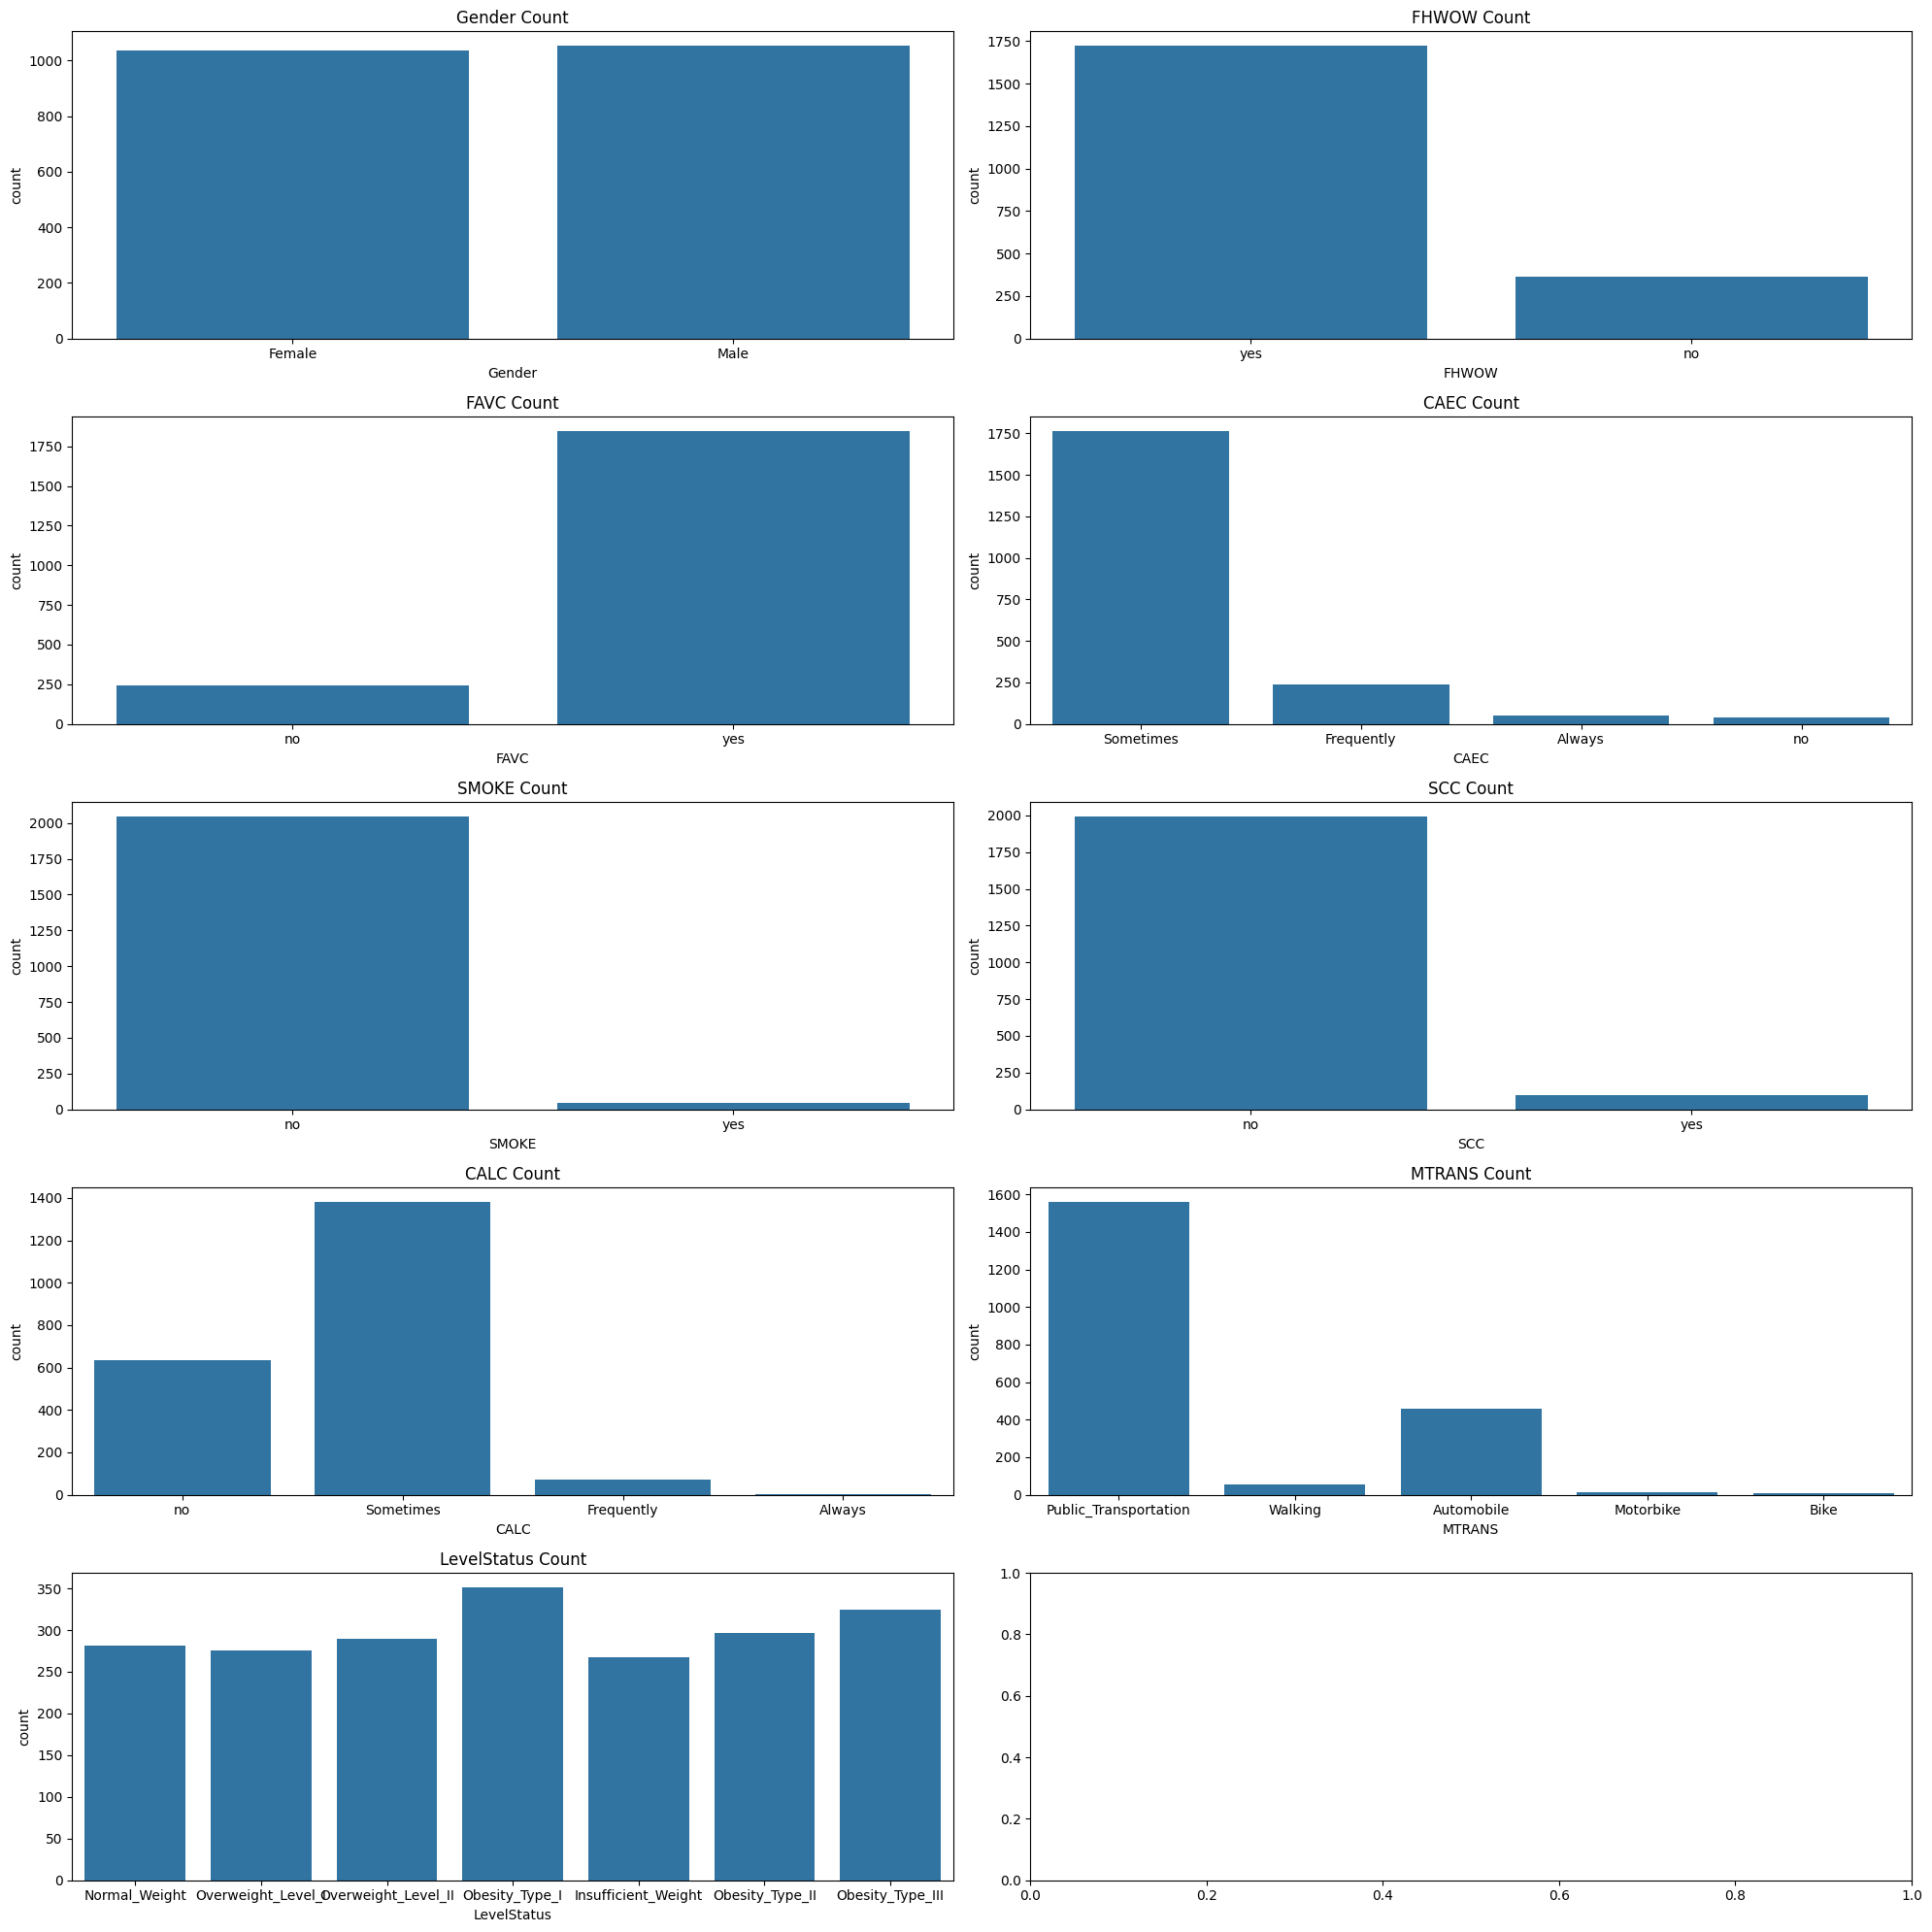

In [23]:
# Bar chart for Categorical Features
# List of categorical/binary features
categorical_features = ['Gender', 'FHWOW', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','LevelStatus']
# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Count')
plt.tight_layout()
plt.show()


## 3.2) BiVariant Analysis

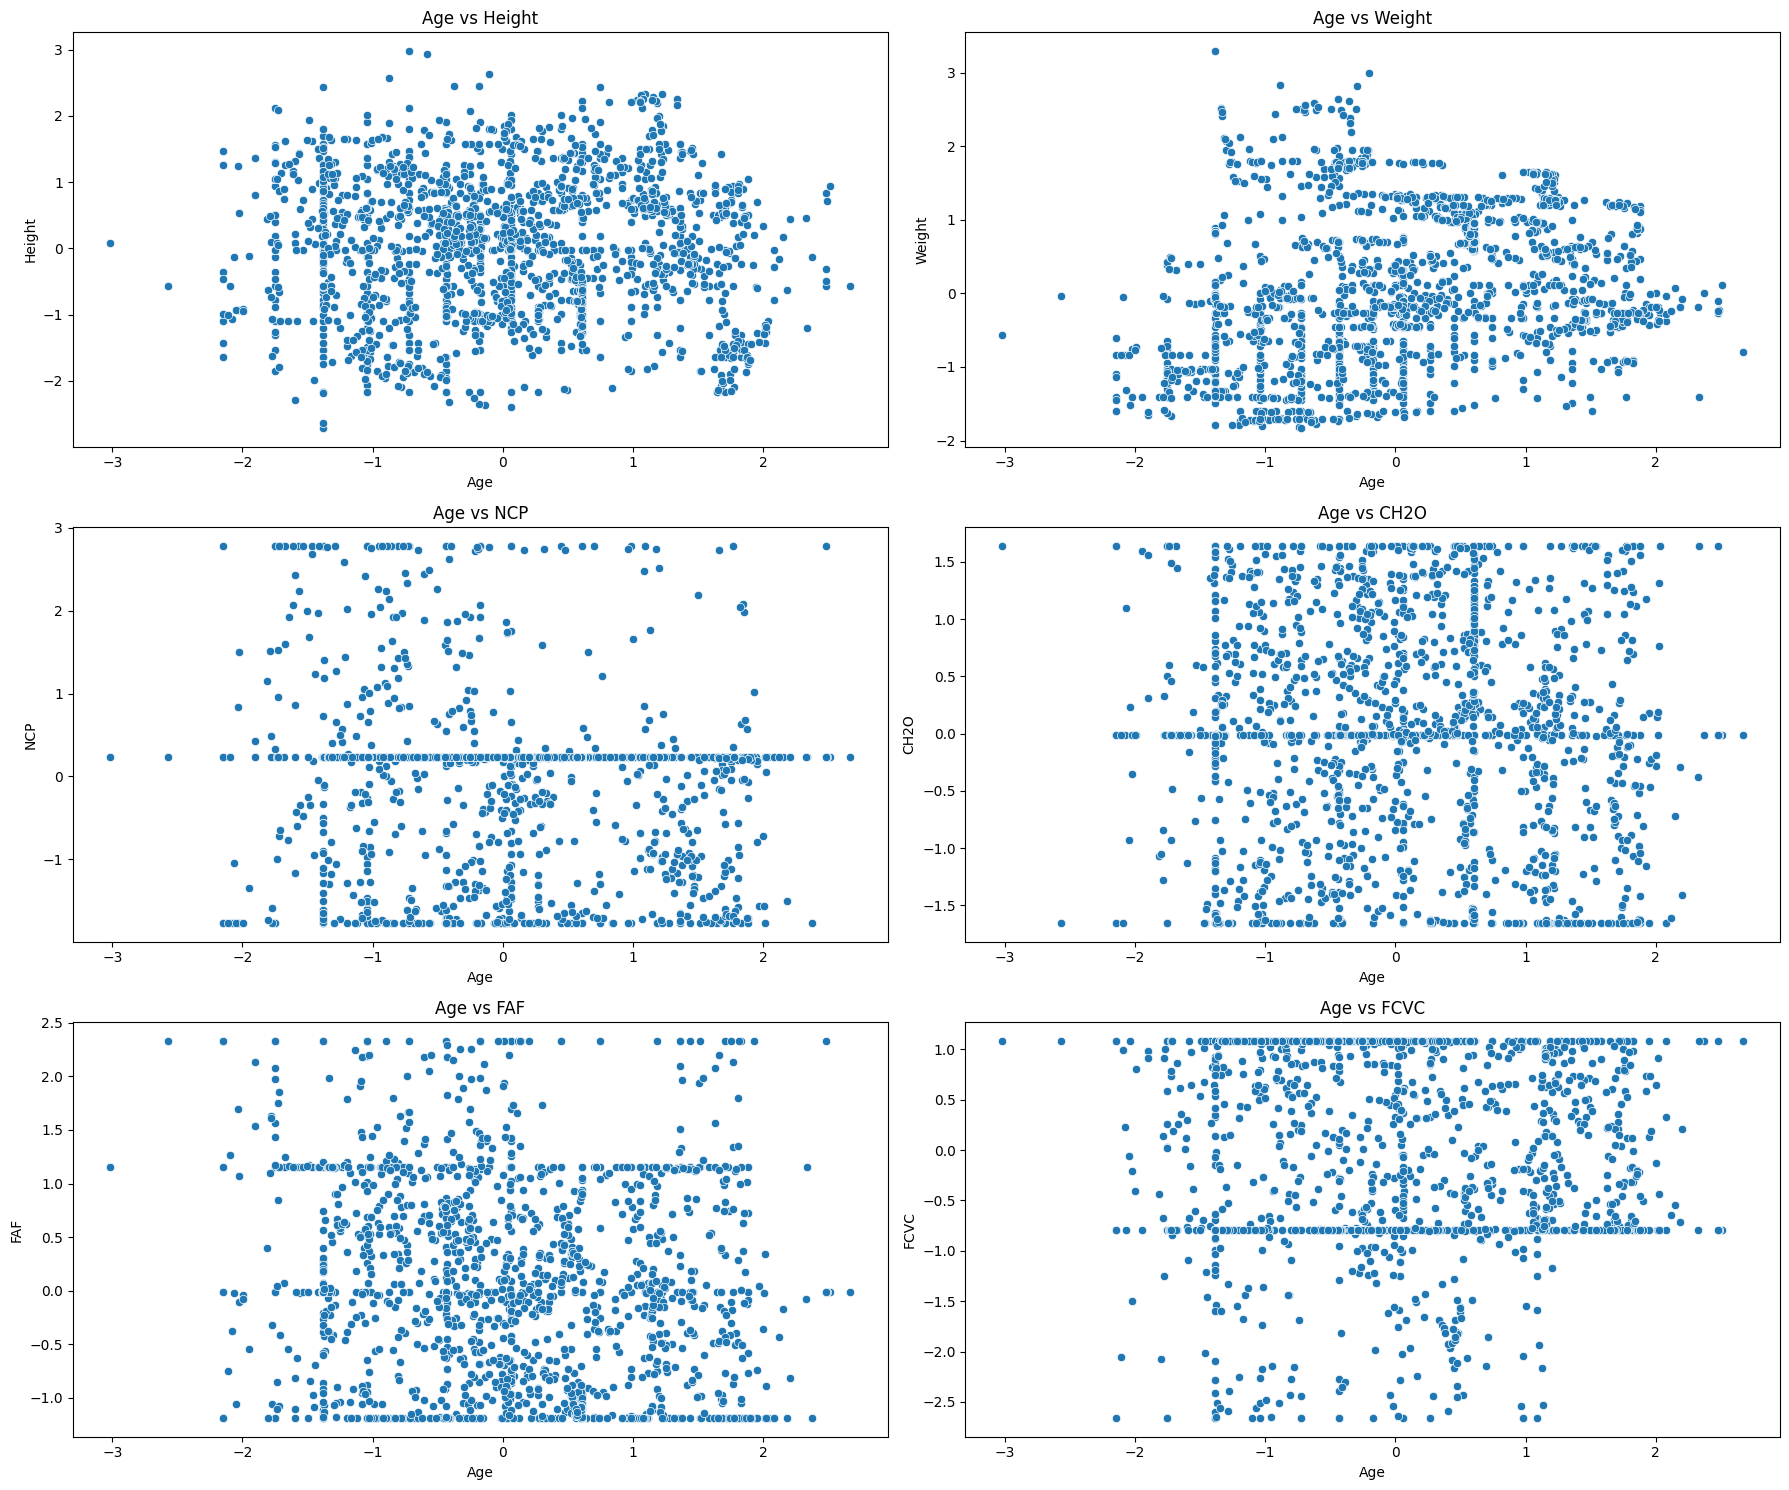

In [24]:
# Numerical VS Numerical
# List of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

# Plot scatter plots for numerical vs numerical
for i, feature in enumerate(numerical_features[1:]):
    sns.scatterplot(x=data['Age'], y=data[feature], ax=axes[i])
    axes[i].set_title(f'Age vs {feature}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()



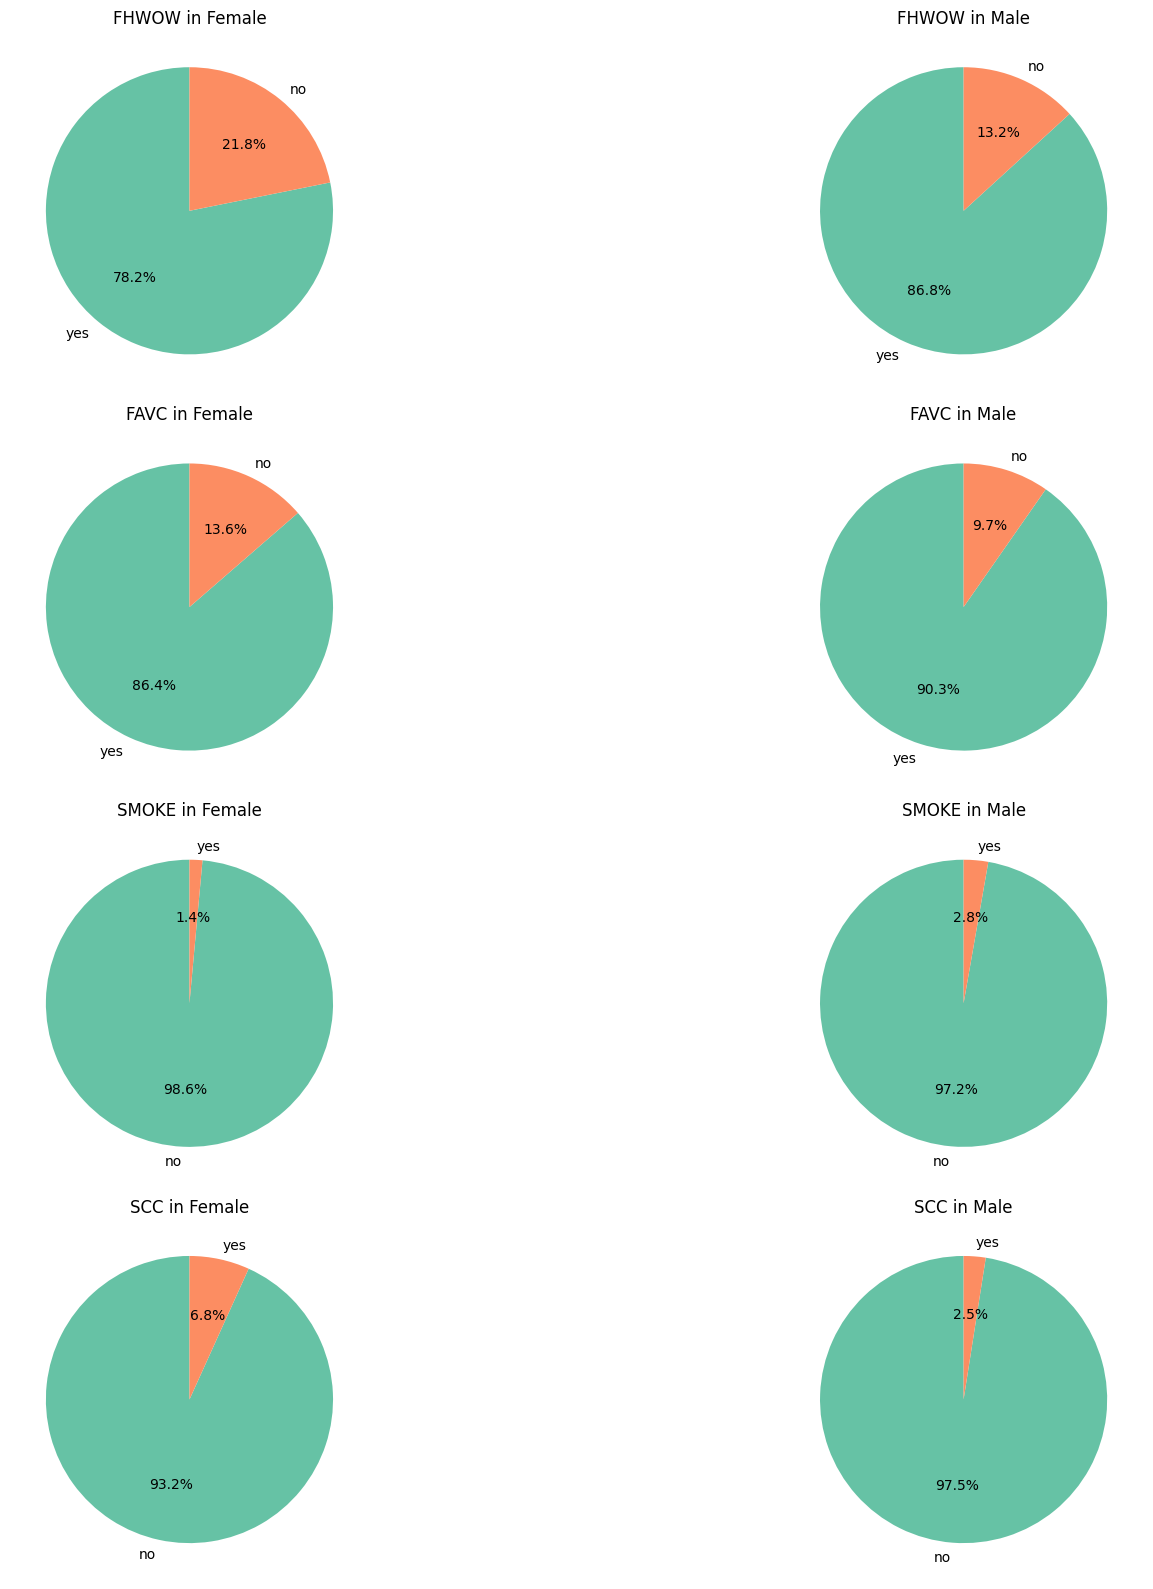

In [25]:
# Categorical Vs Categorical 
# List of categorical features to visualize
cat_features1 = ['FHWOW', 'FAVC',  'SMOKE', 'SCC']
# Unique categories in Gender
genders = data['Gender'].unique()
# Create subplots: 1 row for each feature, 2 columns (one for each gender)
fig, axes = plt.subplots(len(cat_features1), len(genders), figsize=(20, len(cat_features1) * 4))
# Loop over each categorical feature
for i, feature in enumerate(cat_features1):
    # Loop over genders (Male/Female)
    for j, gender in enumerate(genders):
        # Filter data for the specific gender
        gender_data = data[data['Gender'] == gender]
        # Get value counts for the current feature in this gender group
        feature_counts = gender_data[feature].value_counts()
        
        # Create a pie chart in the corresponding subplot
        axes[i, j].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, 
                       colors=sns.color_palette('Set2'))
        axes[i, j].set_title(f'{feature} in {gender}')
# Adjust layout for better visibility
plt.tight_layout()
plt.show()

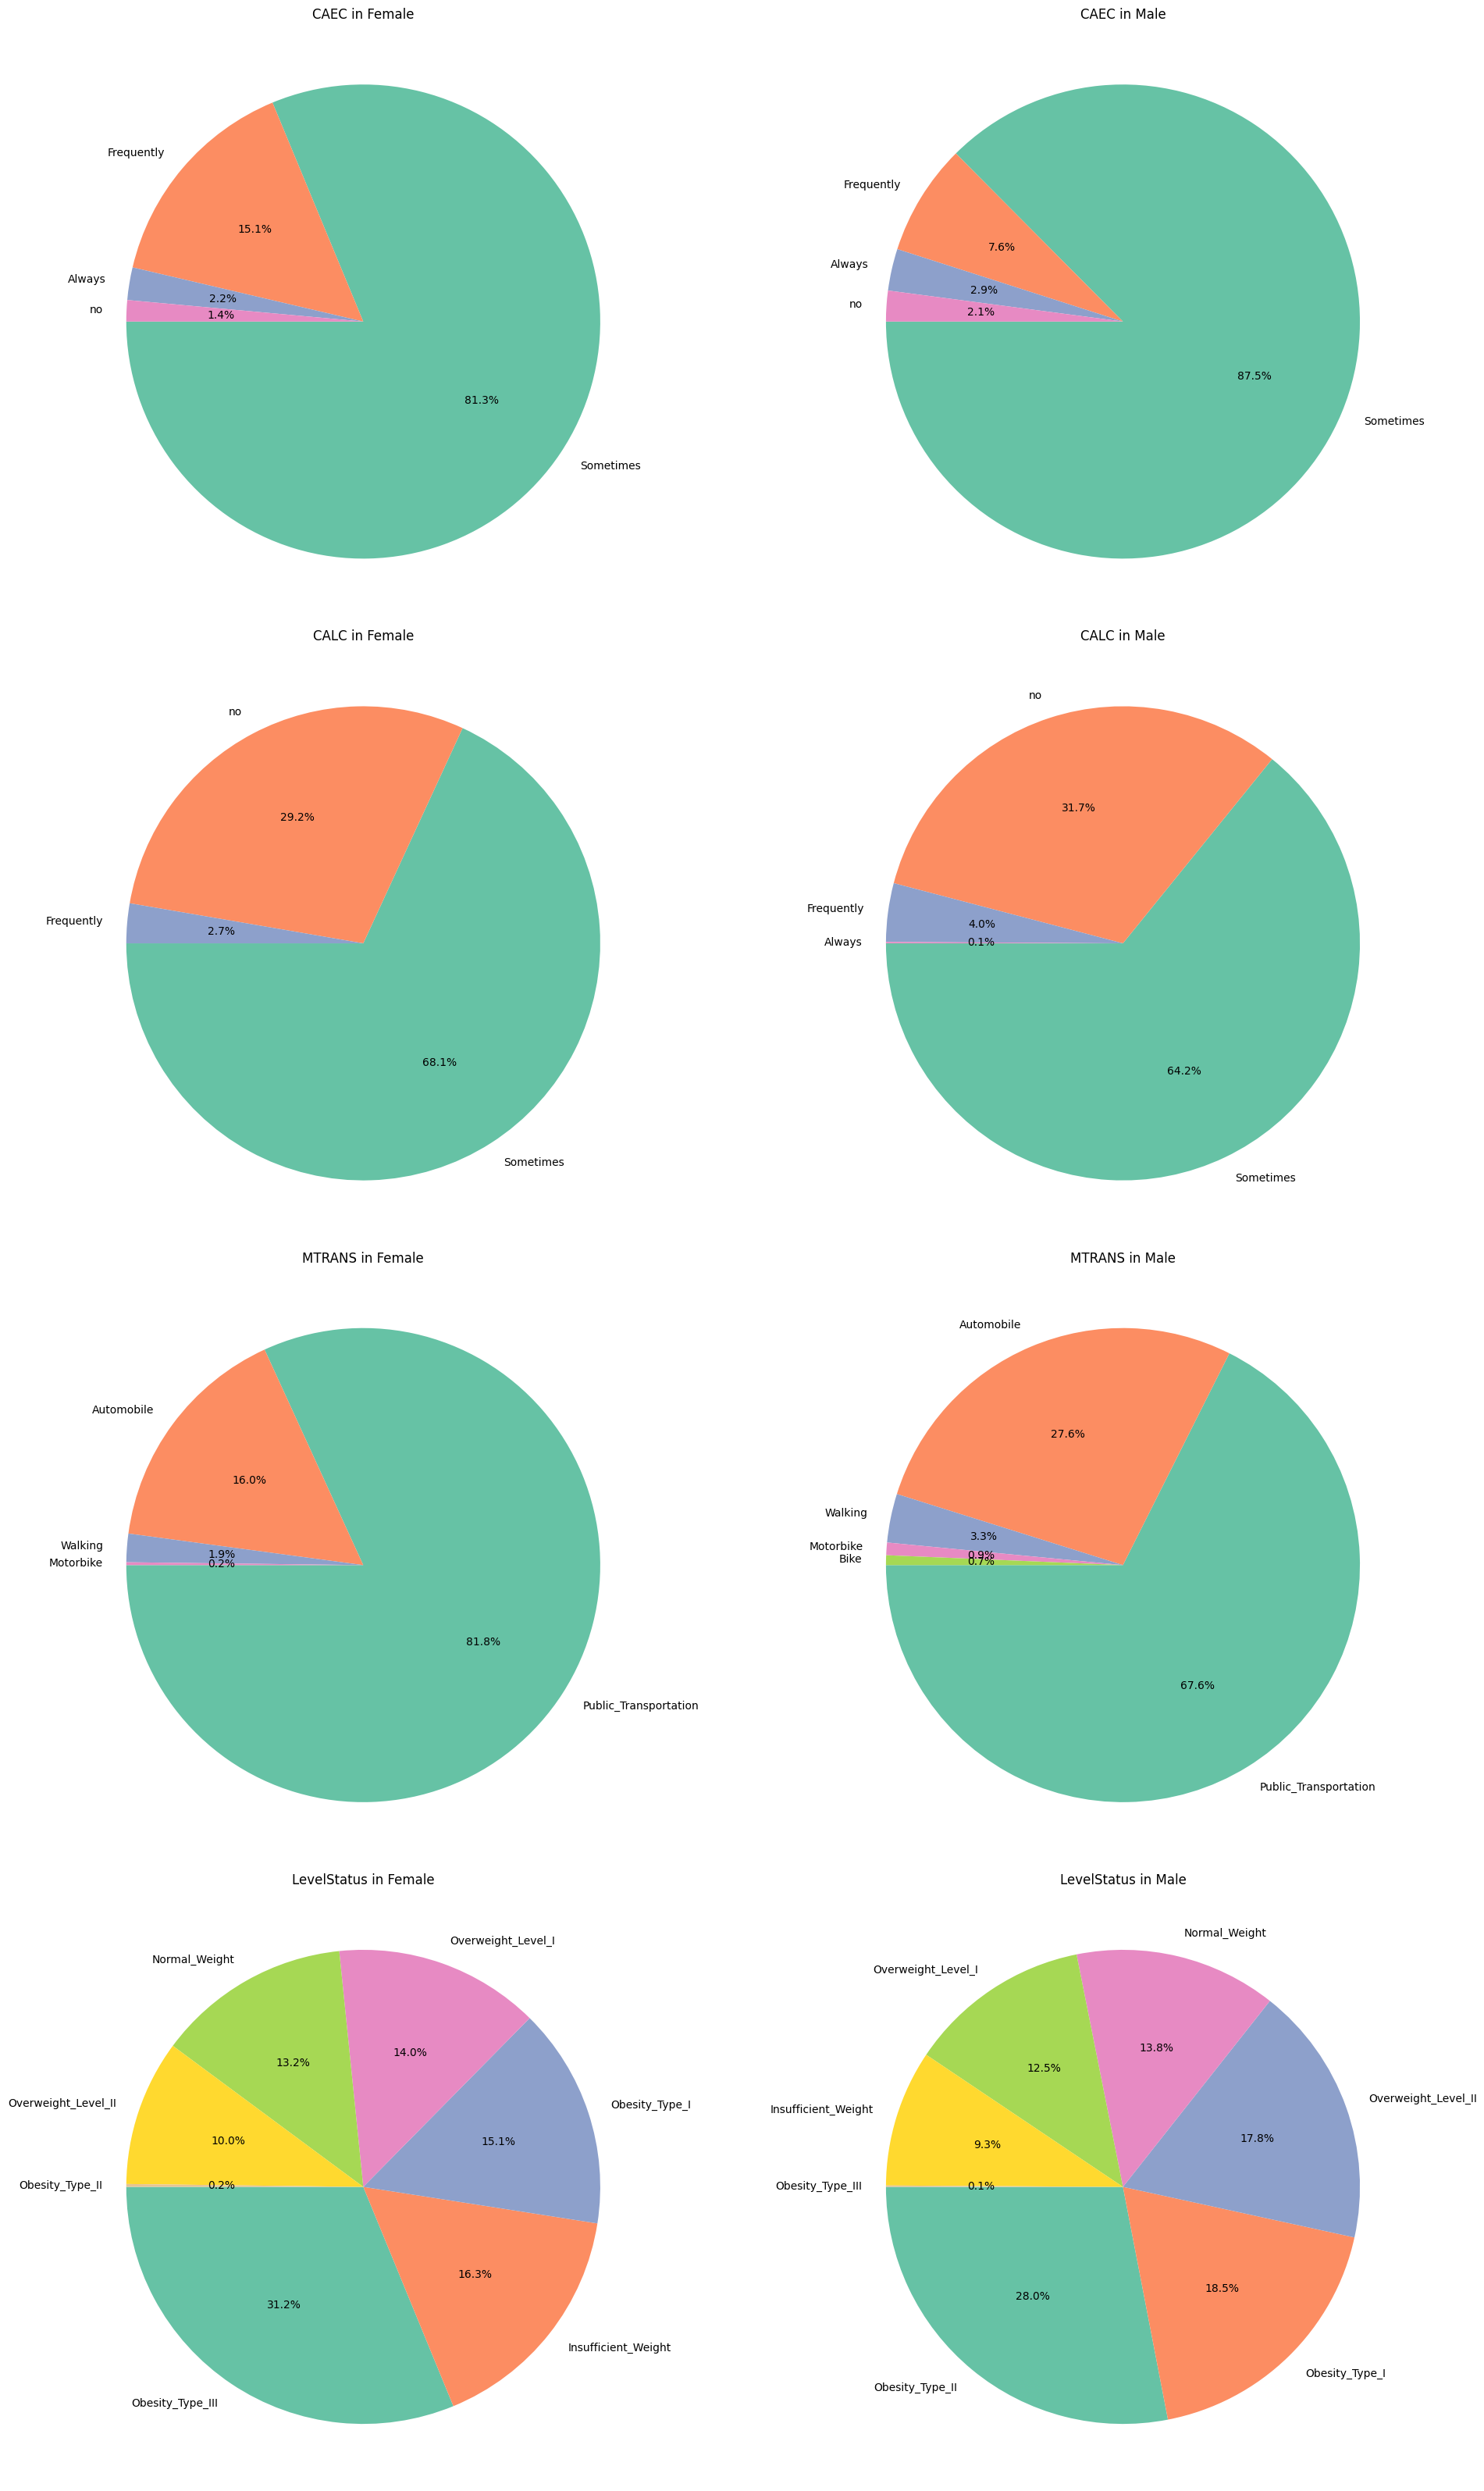

In [26]:
cat_features2=['CAEC','CALC','MTRANS', 'LevelStatus']
# Unique categories in Gender
genders = data['Gender'].unique()
# Create subplots: 1 row for each feature, 2 columns (one for each gender)
fig, axes = plt.subplots(len(cat_features2), len(genders), figsize=(20, len(cat_features2) * 8))

# Loop over each categorical feature
for i, feature in enumerate(cat_features2):
    # Loop over genders (Male/Female)
    for j, gender in enumerate(genders):
        # Filter data for the specific gender
        gender_data = data[data['Gender'] == gender]
        # Get value counts for the current feature in this gender group
        feature_counts = gender_data[feature].value_counts()
        
        # Create a pie chart in the corresponding subplot
        axes[i, j].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=180, 
                       colors=sns.color_palette('Set2'))
        axes[i, j].set_title(f'{feature} in {gender}')
# Adjust layout for better visibility
plt.tight_layout()
plt.show()

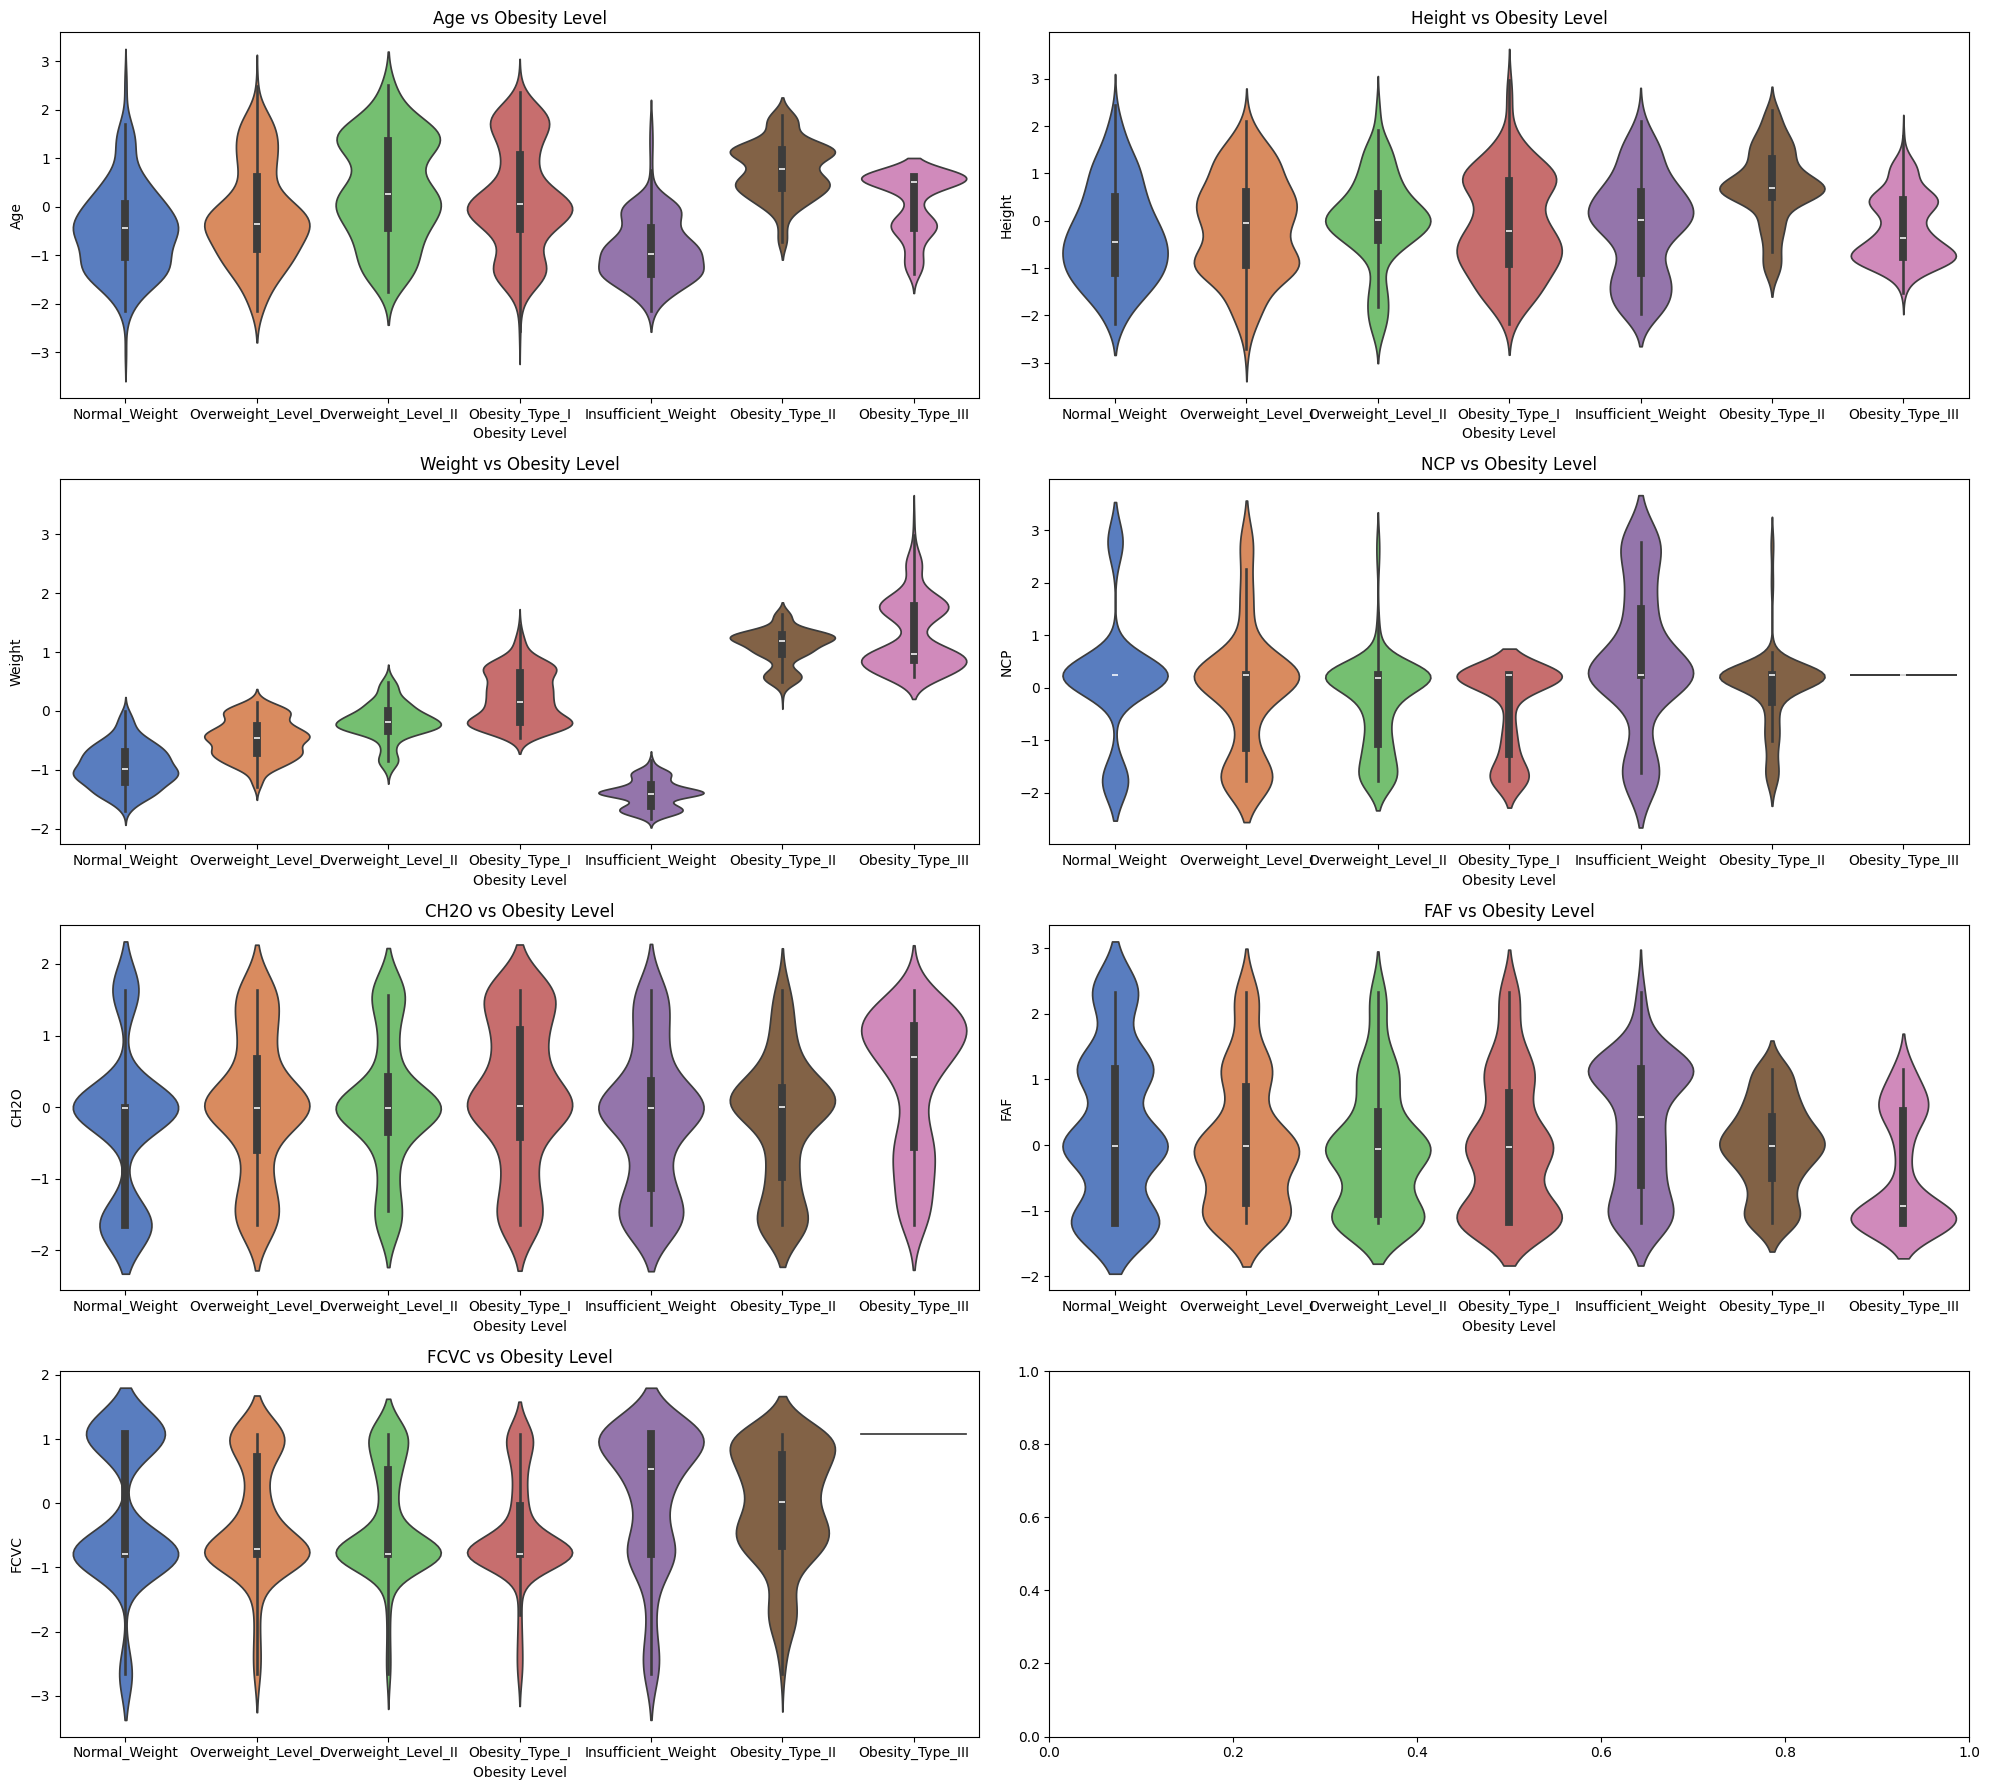

In [27]:
# Numerical Vs Categorical
# Create subplots for numerical vs categorical (violin plots)
fig, axes = plt.subplots(4, 2, figsize=(20, 18))
axes = axes.flatten()
# Plot violin plots for numerical vs categorical
for i, feature in enumerate(['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF','FCVC']):
    sns.violinplot(x=data['LevelStatus'], y=data[feature], ax=axes[i], palette='muted')
    axes[i].set_title(f'{feature} vs Obesity Level')
    axes[i].set_xlabel('Obesity Level')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


## 3.3) MultiVariant Analysis

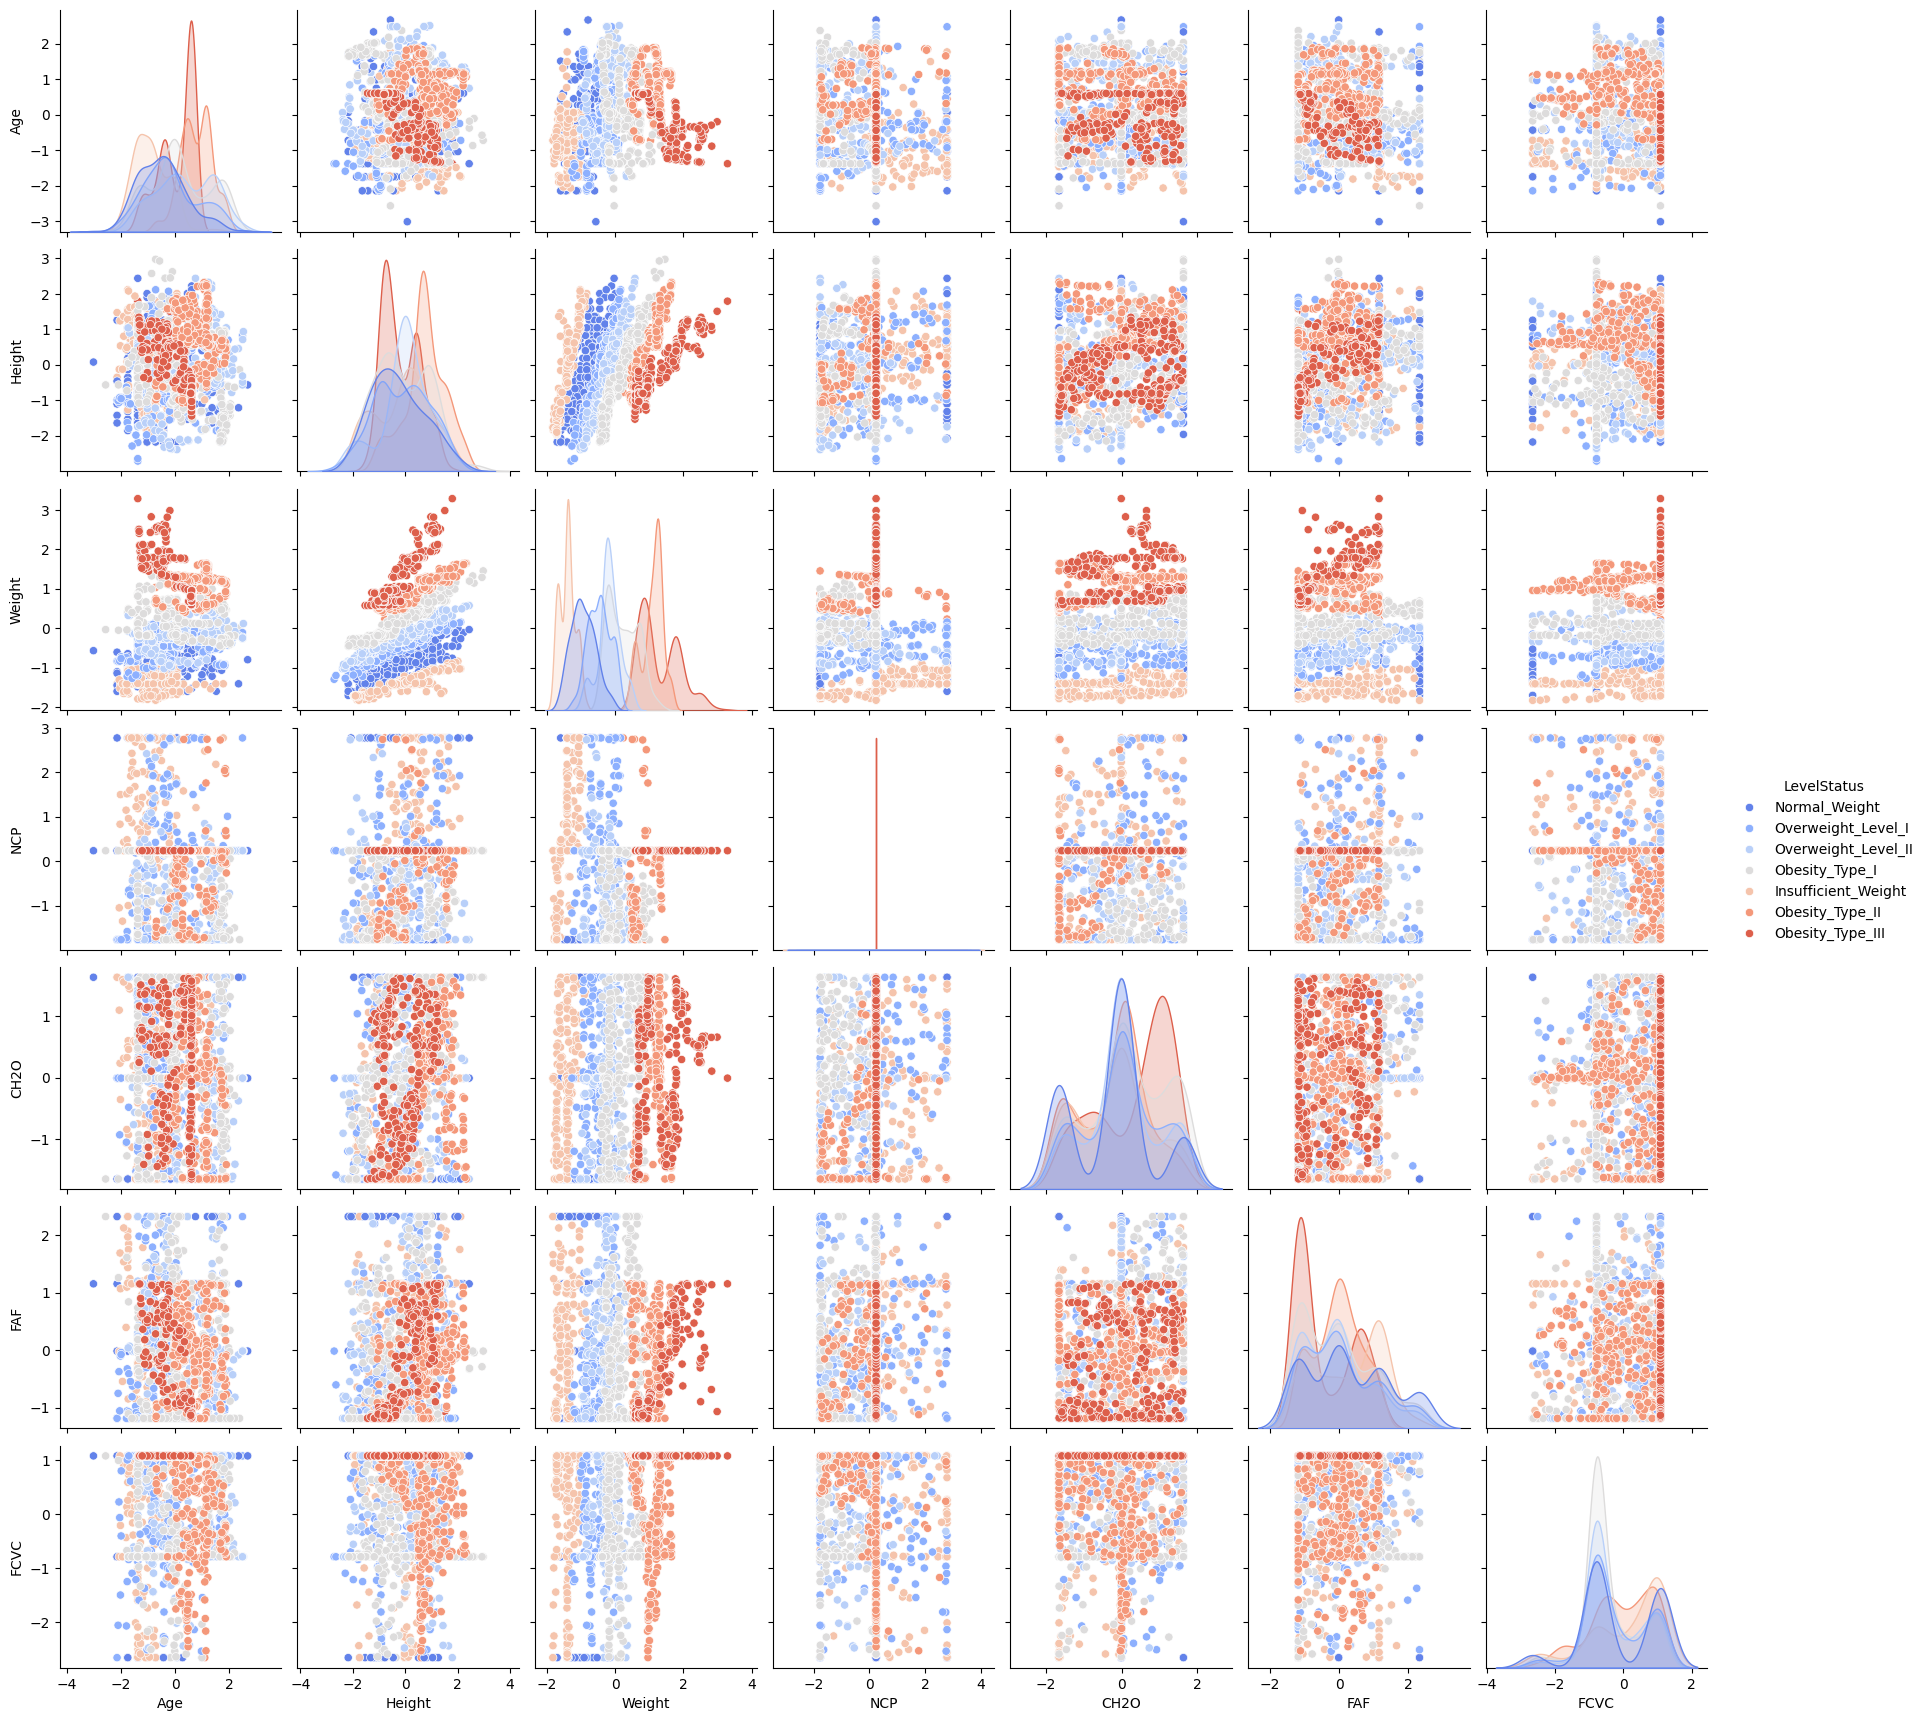

In [28]:
# Pairplot for continuous variables colored by Obesity Level
sns.pairplot(data, vars=continuous_features, hue='LevelStatus', palette='coolwarm')
plt.show()


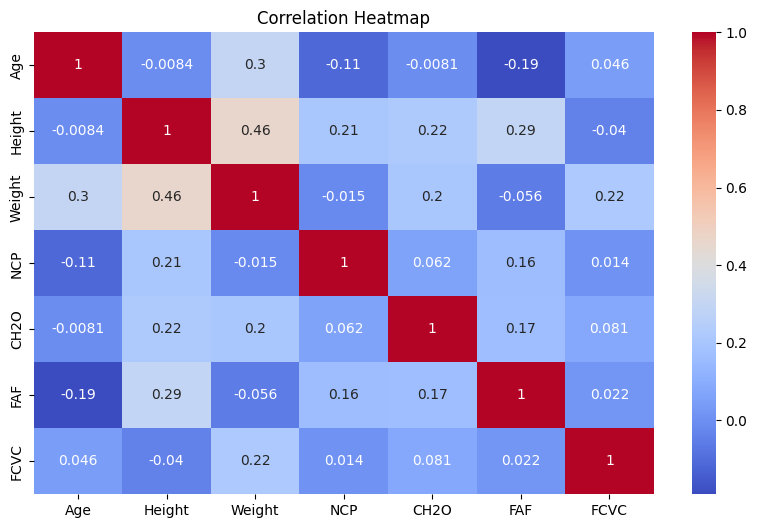

In [29]:
# Correlation matrix for continuous features
corr_matrix = data[continuous_features].corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
# Convert 'Male'/'Female' and 'yes'/'no' to 1/0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['FHWOW'] = data['FHWOW'].map({'yes': 1, 'no': 0})
data['FAVC'] = data['FAVC'].map({'yes': 1, 'no': 0})
data['SMOKE'] = data['SMOKE'].map({'yes': 1, 'no': 0})
data['SCC'] = data['SCC'].map({'yes': 1, 'no': 0})

In [31]:
# checking results
data.head()

Gender       Age    Height    Weight  FHWOW  FAVC      FCVC       NCP  \
0       0 -0.435687 -0.887408 -0.872985      1     0 -0.788364  0.236124   
1       0 -0.435687 -1.960788 -1.178508      1     0  1.082164  0.236124   
2       1  0.060486  1.044677 -0.376509      1     0 -0.788364  0.236124   
3       1  0.744313  1.044677  0.005395      0     0  1.082164  0.236124   
4       1 -0.174023  0.830001  0.112328      0     0 -0.788364 -1.769921   

        CAEC  SMOKE      CH2O  SCC       FAF  TUE        CALC  \
0  Sometimes      0 -0.007810    0 -1.186977  1.0          no   
1  Sometimes      1  1.636552    1  2.328908  0.0   Sometimes   
2  Sometimes      0 -0.007810    0  1.156947  1.0  Frequently   
3  Sometimes      0 -0.007810    0  1.156947  0.0  Frequently   
4  Sometimes      0 -0.007810    0 -1.186977  0.0   Sometimes   

                  MTRANS          LevelStatus  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [32]:
# Encoding  target class for training models (because ML model wont give "Strings" as result) 
# Define the order of categories
ordinal_categories = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
# Instantiate the encoder with the defined order
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories])
# Fit and transform the target variable
data['LevelStatus'] = ordinal_encoder.fit_transform(data[['LevelStatus']])


In [33]:
data.head()

Gender       Age    Height    Weight  FHWOW  FAVC      FCVC       NCP  \
0       0 -0.435687 -0.887408 -0.872985      1     0 -0.788364  0.236124   
1       0 -0.435687 -1.960788 -1.178508      1     0  1.082164  0.236124   
2       1  0.060486  1.044677 -0.376509      1     0 -0.788364  0.236124   
3       1  0.744313  1.044677  0.005395      0     0  1.082164  0.236124   
4       1 -0.174023  0.830001  0.112328      0     0 -0.788364 -1.769921   

        CAEC  SMOKE      CH2O  SCC       FAF  TUE        CALC  \
0  Sometimes      0 -0.007810    0 -1.186977  1.0          no   
1  Sometimes      1  1.636552    1  2.328908  0.0   Sometimes   
2  Sometimes      0 -0.007810    0  1.156947  1.0  Frequently   
3  Sometimes      0 -0.007810    0  1.156947  0.0  Frequently   
4  Sometimes      0 -0.007810    0 -1.186977  0.0   Sometimes   

                  MTRANS  LevelStatus  
0  Public_Transportation          1.0  
1  Public_Transportation          1.0  
2  Public_Transportation          1.0  
3                Walking          2.0  
4  Public_Transportation          3.0

##### Handling Categorical Data: Binary variables created from categorical data, allowing models to process non-numeric information. Each category is represented by a binary variable (0 or 1) that indicates the presence or absence of that category for a given observation.

In [34]:
dummies1 = pd.get_dummies(data['CAEC'], prefix='CAEC')
data = data.drop('CAEC', axis=1)  # Use axis=1 as a keyword argument
data = pd.concat([data, dummies1.astype(int)], axis=1)
# Create dummies for 'CALC'
dummies2 = pd.get_dummies(data['CALC'], prefix='CALC')
data = data.drop('CALC', axis=1)  # Use axis=1 as a keyword argument
data = pd.concat([data, dummies2.astype(int)], axis=1)

# Create dummies for 'MTRANS'
dummies3 = pd.get_dummies(data['MTRANS'], prefix='MTRANS')
data = data.drop('MTRANS', axis=1)  # Use axis=1 as a keyword argument
data = pd.concat([data, dummies3.astype(int)], axis=1)

In [35]:
data.head()

Gender       Age    Height    Weight  FHWOW  FAVC      FCVC       NCP  \
0       0 -0.435687 -0.887408 -0.872985      1     0 -0.788364  0.236124   
1       0 -0.435687 -1.960788 -1.178508      1     0  1.082164  0.236124   
2       1  0.060486  1.044677 -0.376509      1     0 -0.788364  0.236124   
3       1  0.744313  1.044677  0.005395      0     0  1.082164  0.236124   
4       1 -0.174023  0.830001  0.112328      0     0 -0.788364 -1.769921   

   SMOKE      CH2O  ...  CAEC_no  CALC_Always  CALC_Frequently  \
0      0 -0.007810  ...        0            0                0   
1      1  1.636552  ...        0            0                0   
2      0 -0.007810  ...        0            0                1   
3      0 -0.007810  ...        0            0                1   
4      0 -0.007810  ...        0            0                0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0               0        1                  0            0                 0   
1               1        0                  0            0                 0   
2               0        0                  0            0                 0   
3               0        0                  0            0                 0   
4               1        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0  

[5 rows x 27 columns]

### Data Spliting for Traning and Testing

In [36]:
X=data.drop(columns="LevelStatus")
y=data["LevelStatus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Balancing Imbalance Dataset: SMOTE (Synthetic Minority Over-sampling Technique) 

In [37]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

# 4) Feature Extraction

### 4.1) Optimal Number of Features

In [38]:

folds = KFold(n_splits=5, shuffle=True, random_state=100)
hyper_params = [{'n_features_to_select': list(range(1, 26))}]
svm_model = SVC(kernel='linear') 
rfe = RFE(estimator=svm_model)
model_cv = GridSearchCV(estimator=rfe, 
                        param_grid=hyper_params, 
                        scoring='accuracy', 
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)      

model_cv.fit(X_train, y_train)                  
best_model = model_cv.best_estimator_



Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [39]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.551572      0.084810         0.010675        0.002889   
1       0.494948      0.016190         0.006029        0.003604   
2       0.537262      0.044106         0.005081        0.002662   
3       0.577246      0.038497         0.005702        0.000447   
4       0.577100      0.047761         0.005972        0.000617   

   param_n_features_to_select                       params  split0_test_score  \
0                           1  {'n_features_to_select': 1}           0.504348   
1                           2  {'n_features_to_select': 2}           0.947826   
2                           3  {'n_features_to_select': 3}           0.962319   
3                           4  {'n_features_to_select': 4}           0.959420   
4                           5  {'n_features_to_select': 5}           0.953623   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.510145           0.529070           0.476744  ...   
1           0.944928           0.921512           0.927326  ...   
2           0.968116           0.938953           0.941860  ...   
3           0.959420           0.938953           0.944767  ...   
4           0.962319           0.944767           0.956395  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.509875        0.019314               25            0.528686   
1         0.932039        0.012074               24            0.931009   
2         0.951785        0.011469               15            0.953522   
3         0.949466        0.008400               22            0.950617   
4         0.952956        0.006243                5            0.955701   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.511256            0.511611            0.521771   
1            0.931736            0.939042            0.933962   
2            0.951344            0.959361            0.950653   
3            0.951344            0.959361            0.952830   
4            0.951344            0.959361            0.955733   

   split4_train_score  mean_train_score  std_train_score  
0            0.524673          0.519599         0.007021  
1            0.936865          0.934523         0.003044  
2            0.954282          0.953832         0.003071  
3            0.956459          0.954122         0.003304  
4            0.958636          0.956155         0.002827  

[5 rows x 21 columns]

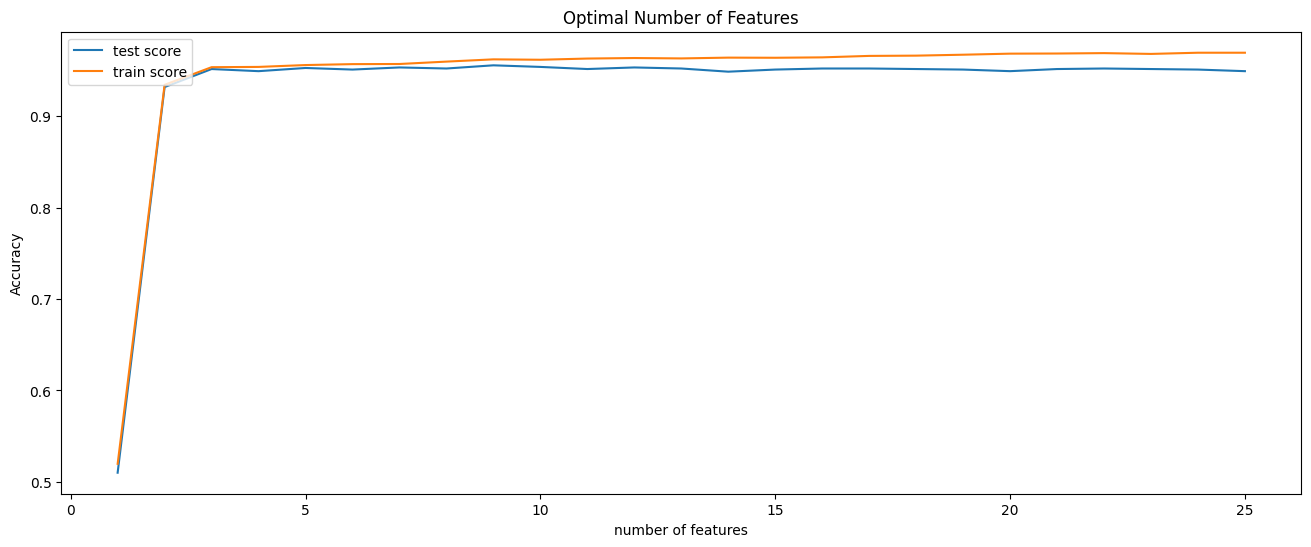

In [40]:
# plotting cv results for finding optimal no of features
# by  checking the plot we can see 17 are the no of optimal features we required for the project
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('Accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### 4.2) Extracting Relevant Features Using Recursive Feature Elimination(RFE)

In [41]:
# using svm model for this
svm_model = SVC(kernel='linear')
# Initialize RFE with the SVM model
rfe = RFE(estimator=svm_model, n_features_to_select=17)  # Specify the number of features to select
# Fit RFE on the training data
rfe.fit(X_train, y_train)
# Get the ranking of features
ranking = rfe.ranking_
selected_features = rfe.support_


In [42]:
# Print the ranking of features
print("Feature Ranking:")
for i, rank in enumerate(ranking):
    print(f"Feature {i}: Rank {rank}")

Feature Ranking:
Feature 0: Rank 1
Feature 1: Rank 1
Feature 2: Rank 1
Feature 3: Rank 1
Feature 4: Rank 1
Feature 5: Rank 1
Feature 6: Rank 1
Feature 7: Rank 5
Feature 8: Rank 1
Feature 9: Rank 7
Feature 10: Rank 1
Feature 11: Rank 1
Feature 12: Rank 8
Feature 13: Rank 1
Feature 14: Rank 1
Feature 15: Rank 2
Feature 16: Rank 9
Feature 17: Rank 10
Feature 18: Rank 1
Feature 19: Rank 6
Feature 20: Rank 1
Feature 21: Rank 1
Feature 22: Rank 3
Feature 23: Rank 1
Feature 24: Rank 1
Feature 25: Rank 4


In [43]:
features_ex=X_train.columns[(rfe.get_support())] 

##### Using  Variance Inflation Factor (VIF) to  a measure used to detect multicollinearity in a dataset.

In [44]:
df_vif = pd.DataFrame(data[numerical_features])
X_vif = sm.add_constant(df_vif)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
  feature       VIF
0   const  1.000000
1     Age  1.158548
2  Height  1.598420
3  Weight  1.637812
4     NCP  1.076003
5    CH2O  1.091287
6     FAF  1.208669
7    FCVC  1.094623


In [45]:
# all 17 relevant features out of all features in dataset
features_ex

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWOW', 'FAVC', 'FCVC', 'SMOKE',
       'SCC', 'FAF', 'CAEC_Always', 'CAEC_Frequently', 'CALC_Frequently',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation'],
      dtype='object')

In [46]:

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# 5) Model Building And Evaluation

### 5.1) Building Base Model with SVM

In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Initialize the SVM model
base_model_svm = SVC(kernel='linear')
# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(base_model_svm, X_train_rfe, y_train, cv=cv, scoring='accuracy')
# Print cross-validation results
print("Cross-validation scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())



Cross-validation scores for each fold: [0.93913043 0.95652174 0.97093023 0.93895349 0.9505814 ]
Mean accuracy: 0.9512234580384227
Standard deviation: 0.011946835196625066


In [48]:
base_model_svm.fit(X_train_rfe, y_train)
y_test_pre_base = base_model_svm.predict(X_test_rfe)
# Calculate accuracy on the test set
ac = accuracy_score(y_test, y_test_pre_base)
print("Test accuracy:", ac)
report = classification_report(y_test, y_test_pre_base)
print("Classification Report:\n", report)
conf_matrix_base = confusion_matrix(y_test, y_test_pre_base)
print("Confusion Matrix:\n", conf_matrix_base)

Test accuracy: 0.963265306122449
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       105
         1.0       0.98      0.92      0.95       105
         2.0       0.93      0.91      0.92       105
         3.0       0.89      0.96      0.93       105
         4.0       1.00      0.95      0.98       105
         5.0       0.99      1.00      1.00       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.96       735
   macro avg       0.96      0.96      0.96       735
weighted avg       0.96      0.96      0.96       735

Confusion Matrix:
 [[104   1   0   0   0   0   0]
 [  5  97   3   0   0   0   0]
 [  0   1  96   8   0   0   0]
 [  0   0   4 101   0   0   0]
 [  0   0   0   4 100   1   0]
 [  0   0   0   0   0 105   0]
 [  0   0   0   0   0   0 105]]


##### *. Ploting ROC curve for multiclass of base model with OneVsRestClassifier

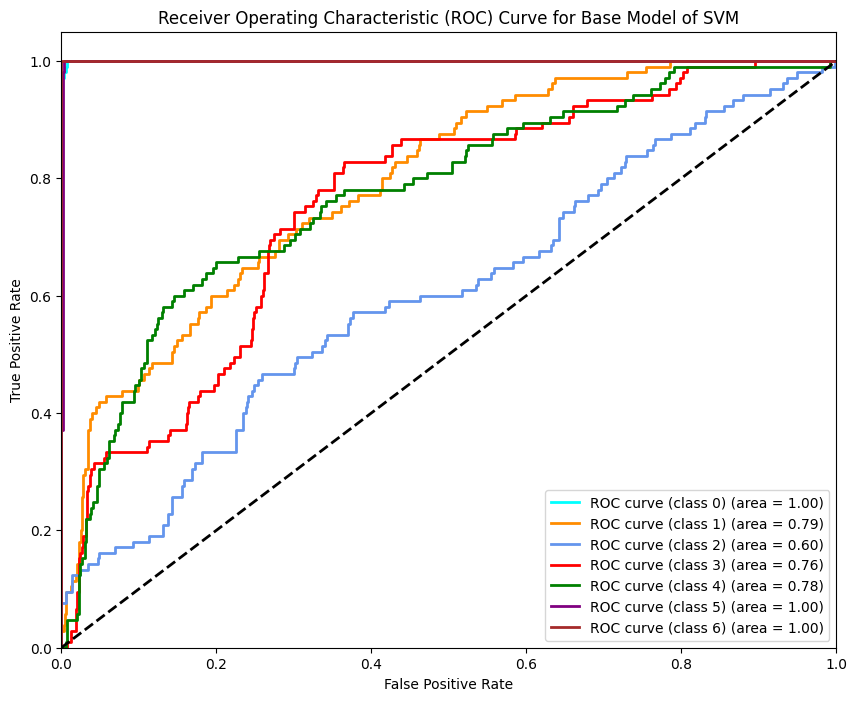

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

n_classes = 7 

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

roc_base_model = OneVsRestClassifier(SVC( kernel='linear', probability=True))
roc_base_model.fit(X_train_rfe, y_train_binarized)

y_score_base = roc_base_model.predict_proba(X_test_rfe)


fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_base[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Base Model of SVM')
plt.legend(loc='lower right')
plt.show()


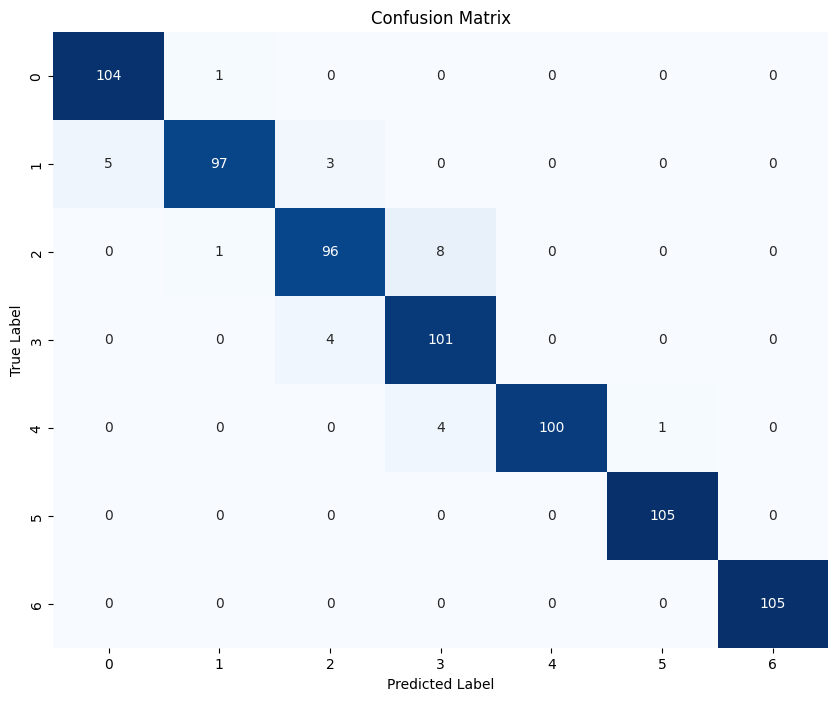

In [50]:
# performance of base model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes))
# Labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


#### Learning Rate of base model of SVM

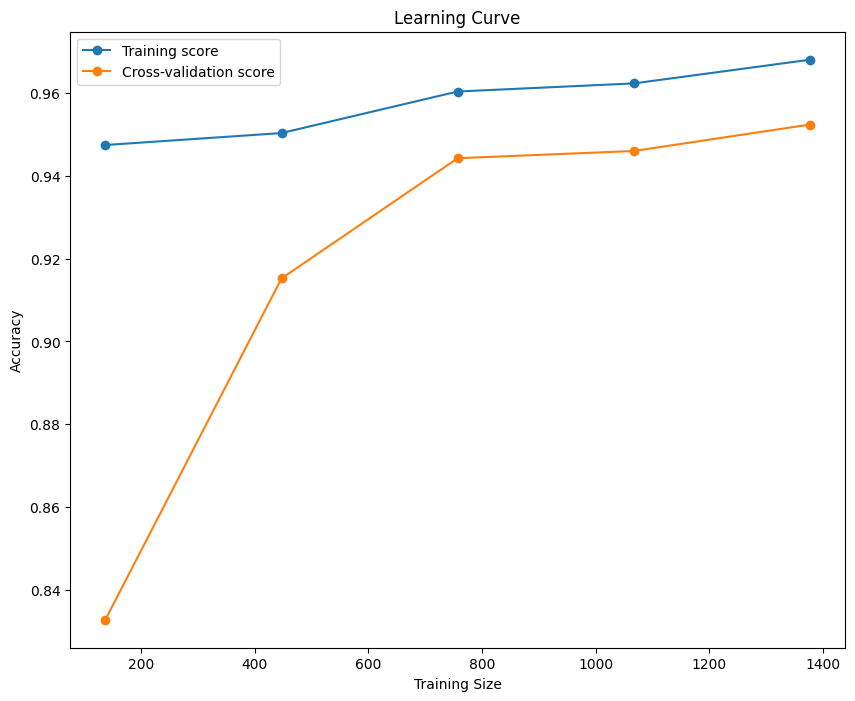

In [51]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve( base_model_svm, X_train_rfe, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


### 5.2) Hyperparameter Tunning For SVM Model

In [52]:

# Define the SVM model
model_hp_tuning = SVC()
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_hp_tuning, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train_rfe, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_rfe, y_test)
print(f"Test Score: {test_score:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9704
Test Score: 0.9728


#### Performance of the final SVM model with optimal hyperparamerters

In [53]:
final_model_svm = SVC(C=100, gamma='auto', kernel='rbf',probability=True)
final_model_svm.fit(X_train_rfe, y_train)
y_train_pred_final = final_model_svm.predict(X_train_rfe)
y_test_pred_final = final_model_svm.predict(X_test_rfe)
train_score_final=accuracy_score(y_train,y_train_pred_final)
test_score_final = accuracy_score(y_test, y_test_pred_final)
# Print evaluation metrics
print(f"Train Score: {train_score_final:.3f}")
print(f"Test Score: {test_score_final:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_final))
print("Confusion Matrix:")
final_confusion_matrix=confusion_matrix(y_test, y_test_pred_final)
print(final_confusion_matrix)

Train Score: 0.999
Test Score: 0.969
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       105
         1.0       0.92      0.93      0.92       105
         2.0       0.93      0.94      0.93       105
         3.0       0.99      0.94      0.97       105
         4.0       0.99      1.00      1.00       105
         5.0       1.00      1.00      1.00       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.97       735
   macro avg       0.97      0.97      0.97       735
weighted avg       0.97      0.97      0.97       735

Confusion Matrix:
[[101   4   0   0   0   0   0]
 [  4  98   3   0   0   0   0]
 [  0   5  99   1   0   0   0]
 [  0   0   5  99   1   0   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0   0   0 105   0]
 [  0   0   0   0   0   0 105]]


#### Learning Rate of Final SVM Model

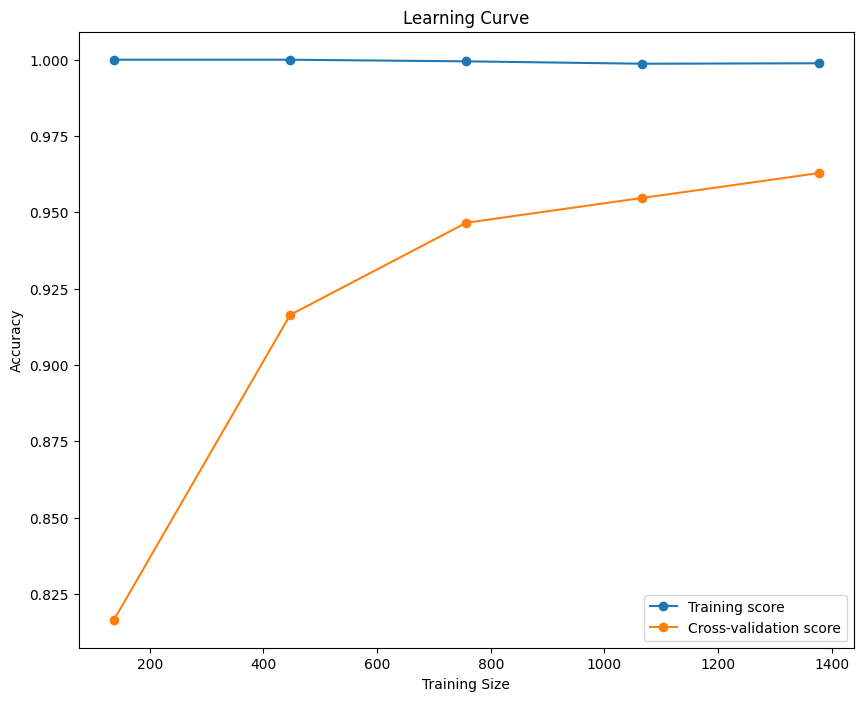

In [54]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve( final_model_svm, X_train_rfe, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


#### Roc Curve for the final model of SVM

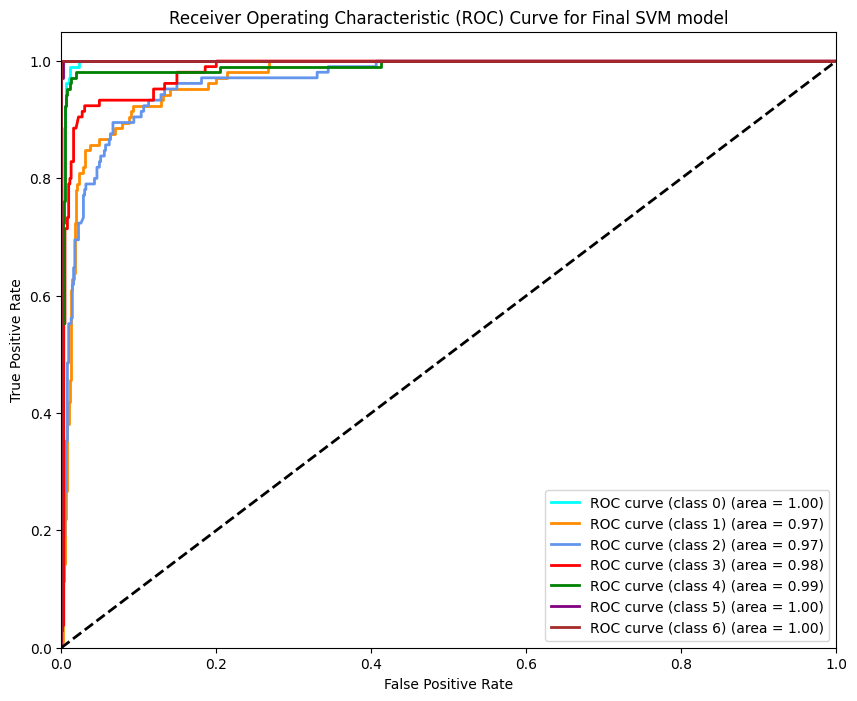

In [55]:
n_classes = 7 
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
roc_final_model = OneVsRestClassifier(SVC(C=100, gamma='auto', kernel='rbf', probability=True))
roc_final_model.fit(X_train_rfe, y_train_binarized)

y_score_final = roc_final_model.predict_proba(X_test_rfe)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final SVM model')
plt.legend(loc='lower right')
plt.show()

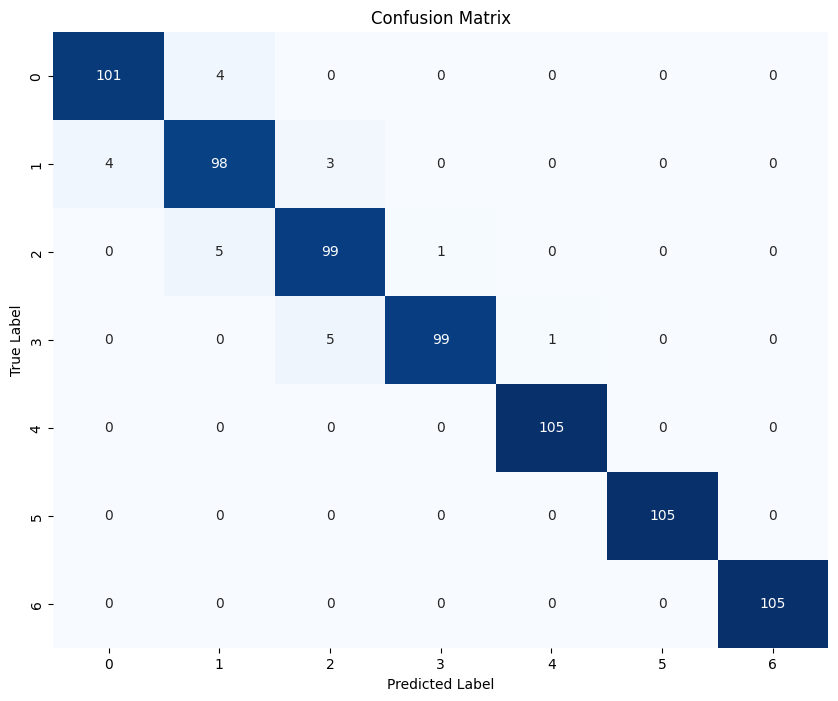

In [56]:
# confusion matrix of final svm model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes))
# Labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## 5.3) Comparison Between Base Model Vs Final SVM Model


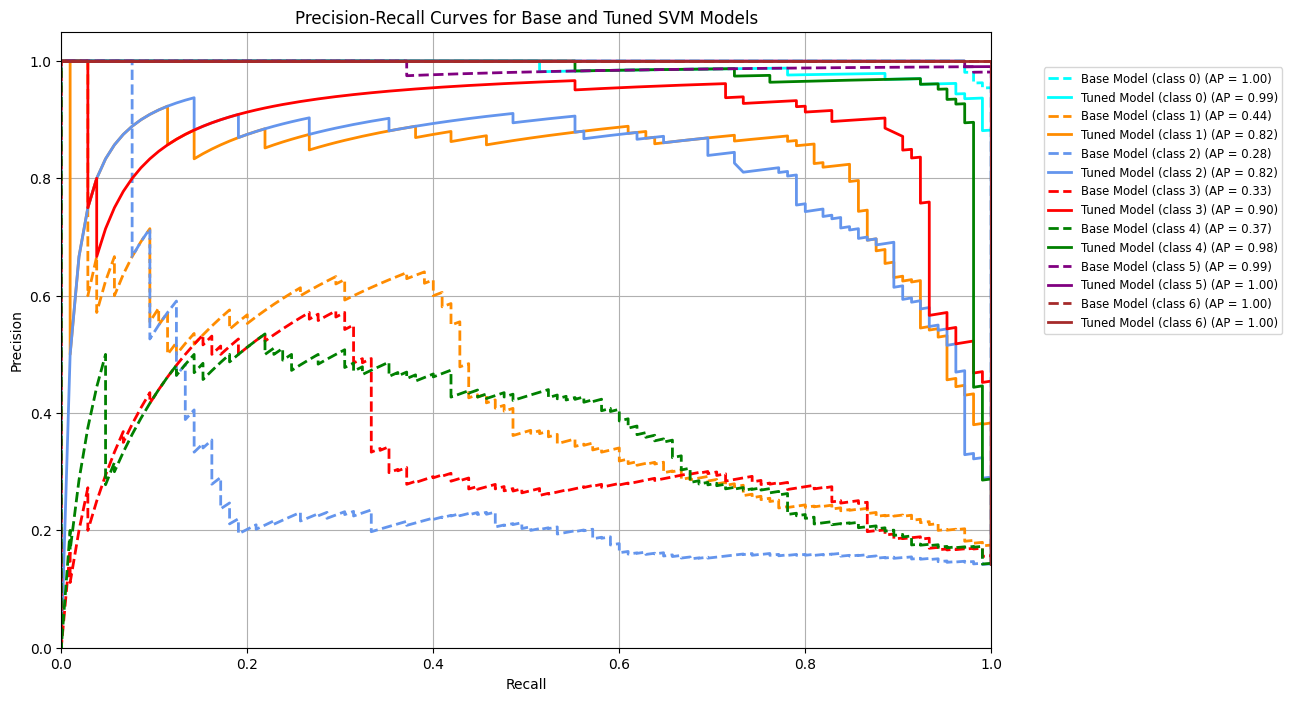

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
n_classes = 7  
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
precision_base = dict()
recall_base = dict()
average_precision_base = dict()
precision_tuned = dict()
recall_tuned = dict()
average_precision_tuned = dict()
for i in range(n_classes):
    # Base model Precision-Recall
    precision_base[i], recall_base[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score_base[:, i])
    average_precision_base[i] = average_precision_score(y_test_binarized[:, i], y_score_base[:, i])

    # Tuned model Precision-Recall
    precision_tuned[i], recall_tuned[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score_final[:, i])
    average_precision_tuned[i] = average_precision_score(y_test_binarized[:, i], y_score_final[:, i])
plt.figure(figsize=(12, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']

for i in range(n_classes):
    plt.plot(recall_base[i], precision_base[i], color=colors[i], lw=2, linestyle='--',
             label='Base Model (class {0}) (AP = {1:0.2f})'.format(i, average_precision_base[i]))
    plt.plot(recall_tuned[i], precision_tuned[i], color=colors[i], lw=2,
             label='Tuned Model (class {0}) (AP = {1:0.2f})'.format(i, average_precision_tuned[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Base and Tuned SVM Models')
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()


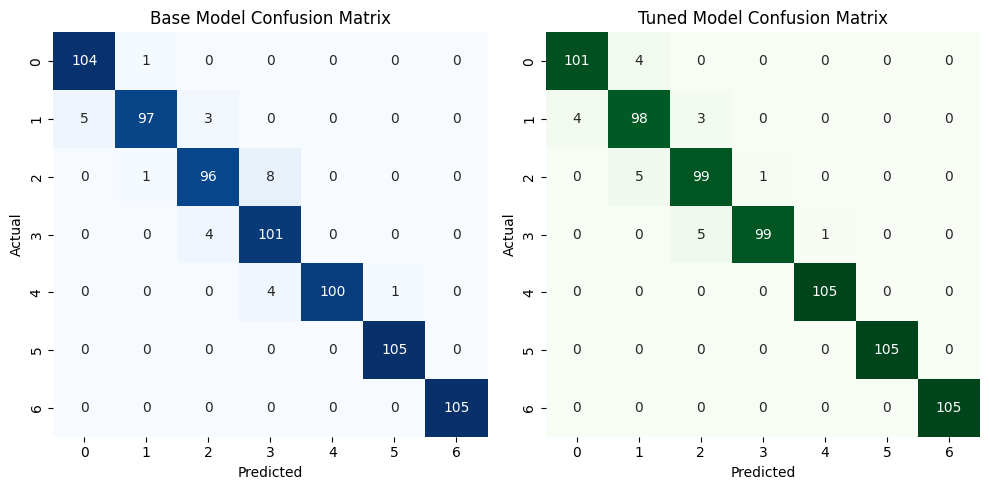

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# 3. Plotting the Confusion Matrix Heatmap for Base Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First subplot
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Base Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# 4. Plotting the Confusion Matrix Heatmap for Tuned Model
plt.subplot(1, 2, 2)  # Second subplot
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Tuned Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


##  5.4) Decsion Tree Base Model


In [59]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import os
from sklearn.metrics import RocCurveDisplay
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz-12.1.2-win64\bin"

In [60]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)
dt_base_cfmatrix=confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       105
         1.0       0.87      0.81      0.84       105
         2.0       0.86      0.90      0.88       105
         3.0       0.89      0.92      0.91       105
         4.0       0.98      0.96      0.97       105
         5.0       1.00      0.98      0.99       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.93       735
   macro avg       0.93      0.93      0.93       735
weighted avg       0.93      0.93      0.93       735

1.0
0.9319727891156463


#### Roc Curve for the base model of Decision Tree

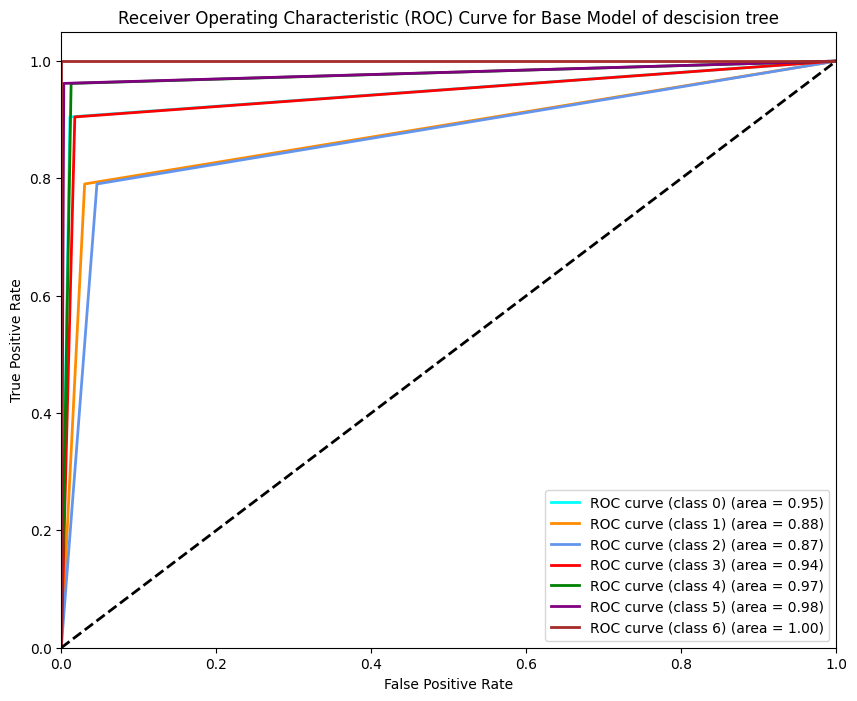

In [61]:
n_classes = 7 
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

roc_final_model = OneVsRestClassifier(dt_base)
roc_final_model.fit(X_train, y_train_binarized)

y_score_final = roc_final_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Base Model of descision tree')
plt.legend(loc='lower right')
plt.show()

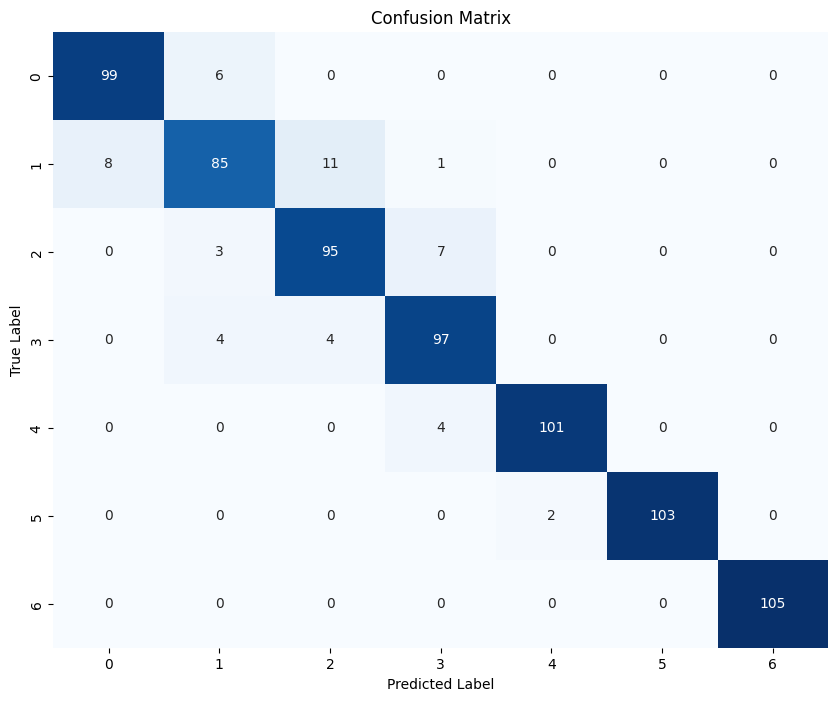

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(dt_base_cfmatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes))

# Labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


#### Tree Diagram of base model 

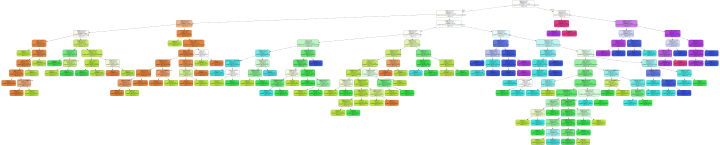

In [63]:
selected_features_base = X_train.columns
dot_data = export_graphviz(dt_base, 
                           out_file=None, 
                           feature_names=selected_features_base,  # Use selected feature names
                           class_names=[f'{i}' for i in range(7)],  # Assuming class labels from 0 to 6
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Create a Graphviz source from the DOT data
dot_data=dot_data.replace('digraph Tree {', 'digraph Tree {\n  size="10,10!";') 
graph = graphviz.Source(dot_data)
graph.render("decision_tree_base_model")  # Save to file
display(graph)

#### Feature Selection for Decision Tree Model

In [64]:
from sklearn.feature_selection import RFE
# Fit RFE
selector = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=17)
selector = selector.fit(X_train, y_train)
# Get selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


#### Hyper-parameter tuning for the Decision Tree

In [92]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': list(range(1, 11)),
    'min_samples_split':[2,4,5,10,20,30,50],
    'min_samples_leaf': [2,3,5,10,25,30,50],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 10, 25, 30, 50],
                         'min_samples_split': [2, 4, 5, 10, 20, 30, 50]},
             scoring='accuracy', verbose=1)

In [93]:
dt_best = grid_search.best_estimator_
print(dt_best)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)


In [67]:
grid_search.best_score_

0.9703926525109537

#### Performance of the final Decision Tree model with optimal hyperparamerters

In [68]:
dt_final=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=10, random_state=42)

dt_final.fit(X_train_selected, y_train)
y_train_pred = dt_final.predict(X_train_selected)
y_test_pred = dt_final.predict(X_test_selected)
dt_final_cfmatrix=confusion_matrix(y_test_pred,y_test)
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       105
         1.0       0.88      0.86      0.87       105
         2.0       0.86      0.91      0.89       105
         3.0       0.97      0.94      0.96       105
         4.0       0.94      0.98      0.96       105
         5.0       1.00      0.97      0.99       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.94       735
   macro avg       0.94      0.94      0.94       735
weighted avg       0.94      0.94      0.94       735

0.980836236933798
0.9442176870748299


#### Learning Rate of Final  model of Decision Tree

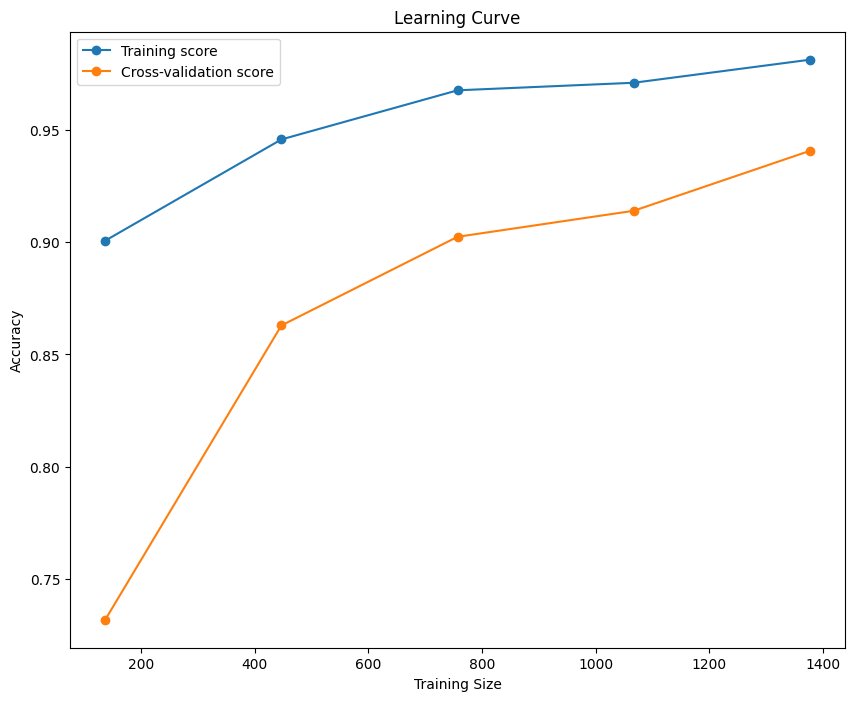

In [69]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve( dt_final, X_train_selected, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


#### Roc Curve for the final model of Decision Tree

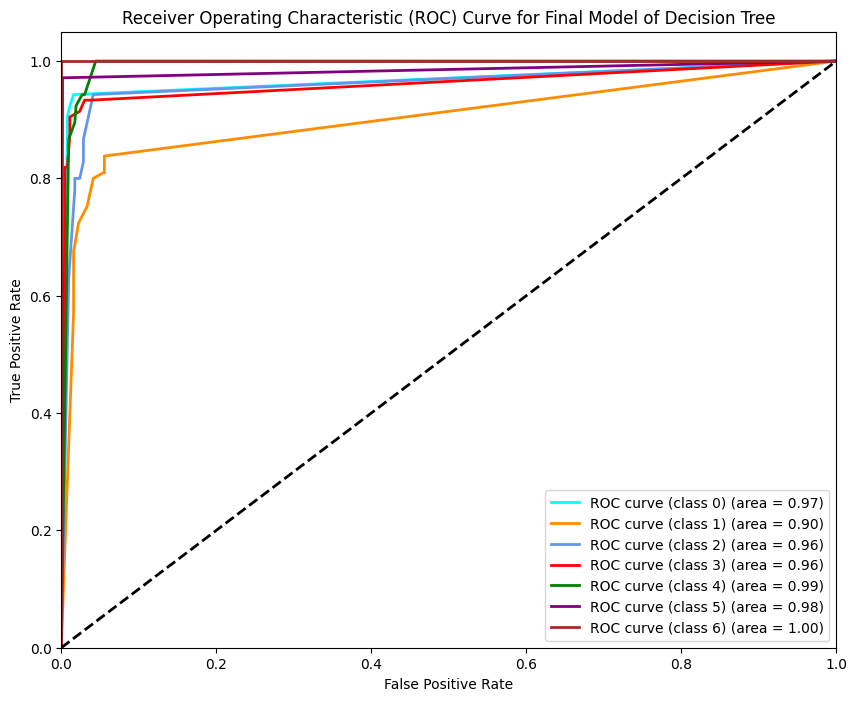

In [70]:
n_classes = 7 

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])


roc_final_model = OneVsRestClassifier(dt_final)
roc_final_model.fit(X_train_selected, y_train_binarized)

y_score_final = roc_final_model.predict_proba(X_test_selected)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model of Decision Tree')
plt.legend(loc='lower right')
plt.show()

#### Tree Diagram  of Final Decision Tree Model

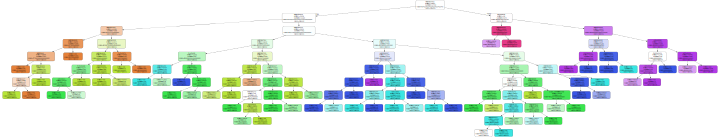

In [71]:
feature_names = X_train.columns
selected_features_mask = selector.get_support()
selected_features_final=feature_names[selected_features_mask]
# Export the decision tree to DOT format
dot_data = export_graphviz(dt_final, 
                           out_file=None, 
                           feature_names=selected_features_final,  # Use selected feature names
                           class_names=[f'Class {i}' for i in range(7)],  # Assuming class labels from 0 to 6
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Manually add the size attribute to the digraph
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\n  size="10,10!";')  
# Create the graph with graphviz
graph = graphviz.Source(dot_data)

# Save and display the graph
graph.render("decision_tree_base_final")  # Save to file
display(graph)


### Comparison Between Base Model Vs Final Decision Tree Model

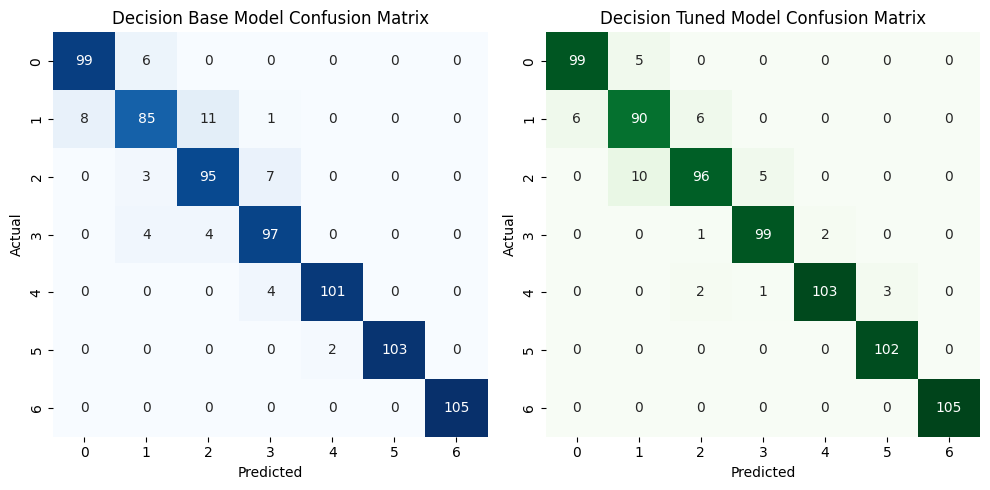

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 3. Plotting the Confusion Matrix Heatmap for Base Model
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.heatmap(dt_base_cfmatrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Base Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4. Plotting the Confusion Matrix Heatmap for Tuned Model
plt.subplot(1, 2, 2)  # Second subplot
sns.heatmap(dt_final_cfmatrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Decision Tuned Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## 5.6) Random Forest

### Building Base Model Of Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(random_state=100, oob_score=True)

In [74]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=100)

In [75]:
rf_base.oob_score_

0.9541231126596981

In [76]:
y_train_pred_rf = rf_base.predict(X_train)
y_test_pred_rf = rf_base.predict(X_test)
print("train Score")
print(accuracy_score(y_train,y_train_pred_rf))
print("test Score")
print(accuracy_score(y_test,y_test_pred_rf))
print("classification_report")
print(classification_report(y_test, y_test_pred_rf))
print("confusion_matrix")
rf_base_cm=confusion_matrix(y_test, y_test_pred_rf)
print(rf_base_cm)

train Score
1.0
test Score
0.9537414965986395
classification_report
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       105
         1.0       0.83      0.92      0.87       105
         2.0       0.96      0.90      0.93       105
         3.0       0.94      0.94      0.94       105
         4.0       1.00      0.96      0.98       105
         5.0       1.00      1.00      1.00       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.95       735
   macro avg       0.96      0.95      0.95       735
weighted avg       0.96      0.95      0.95       735

confusion_matrix
[[100   5   0   0   0   0   0]
 [  4  97   3   1   0   0   0]
 [  0   9  94   2   0   0   0]
 [  0   5   1  99   0   0   0]
 [  0   1   0   3 101   0   0]
 [  0   0   0   0   0 105   0]
 [  0   0   0   0   0   0 105]]


#### Learning Rate of base model of Random Forest

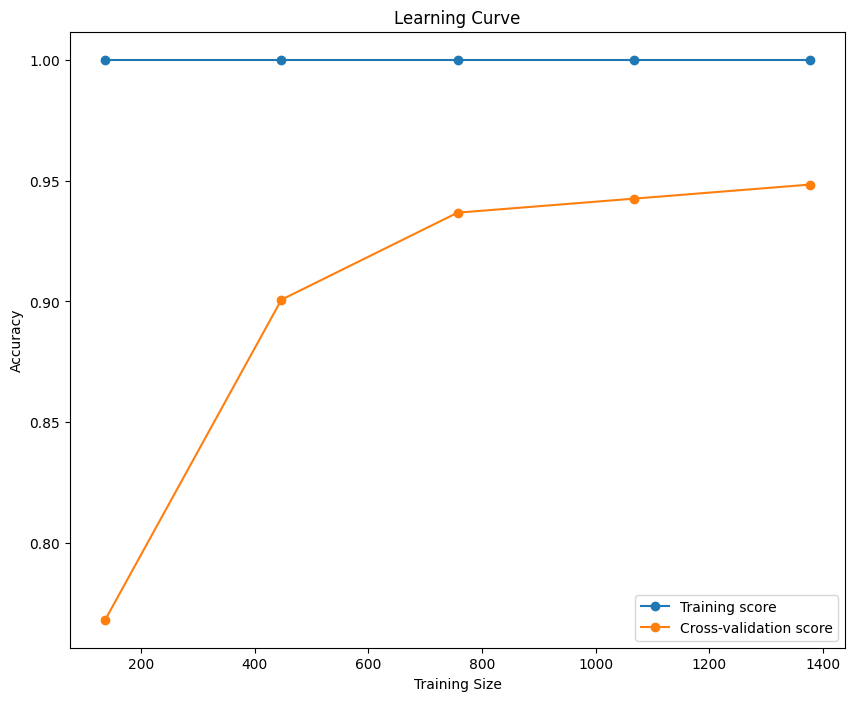

In [77]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve( rf_base, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


#### Roc Curve for the final model of Random Forest

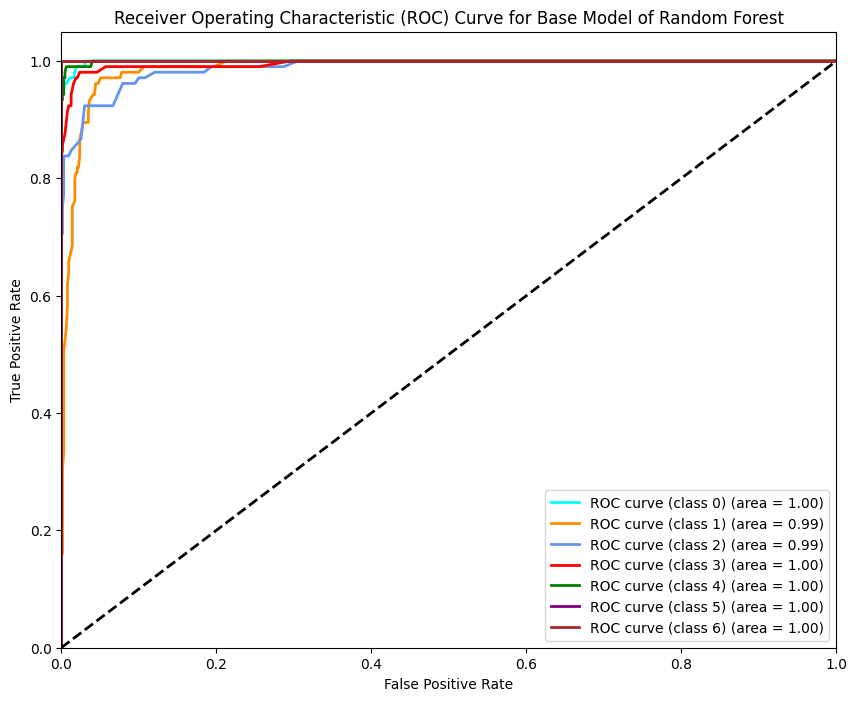

In [78]:
n_classes = 7 
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
roc_final_model = OneVsRestClassifier(rf_base)
roc_final_model.fit(X_train, y_train_binarized)

y_score_final = roc_final_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Base Model of Random Forest')
plt.legend(loc='lower right')
plt.show()

#### Tree Diagram for Random Forest  Base Model

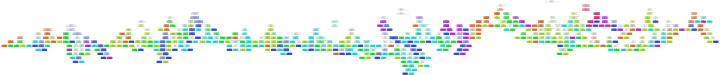

In [79]:
feature_names_rf_base = X_train.columns
# selected_features_mask = selector.get_support()
# selected_features_rf_base=feature_names[selected_features_mask]
dot_data = export_graphviz(rf_base.estimators_[5], 
                           out_file=None, 
                           feature_names=feature_names_rf_base,  # Use selected feature names
                           class_names=[f'{i}' for i in range(7)],  # Assuming class labels from 0 to 6
                           filled=True, 
                           rounded=True, 
                           special_characters=True)


dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\n  size="10,10!";')  
graph = graphviz.Source(dot_data)
display(graph)


#### Feature Extraction For Random Forest

In [80]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
3                         Weight    0.309386
2                         Height    0.093430
1                            Age    0.093324
6                           FCVC    0.086045
0                         Gender    0.054287
7                            NCP    0.051161
9                           CH2O    0.046612
11                           FAF    0.045202
12                           TUE    0.044869
4                          FHWOW    0.031083
15                CAEC_Sometimes    0.020439
20                       CALC_no    0.019533
19                CALC_Sometimes    0.019371
14               CAEC_Frequently    0.017567
24  MTRANS_Public_Transportation    0.016755
5                           FAVC    0.015157
21             MTRANS_Automobile    0.013661
10                           SCC    0.006291
18               CALC_Frequently    0.003969
25                MTRANS_Walking    0.003059
16                       CAEC_no    0.003053
13        

In [81]:
n = 17  
top_features_rf = importance_df['Feature'].head(n).values
X_train_selected_rf = X_train[top_features_rf]
X_test_selected_rf = X_test[top_features_rf]

###  Hyperparameter Tunning For Random Forest Model

In [94]:
rf_tune = RandomForestClassifier(random_state=42, n_jobs=-1)
params_rf = {
    'max_depth': [2,3,5,8,10],
    'min_samples_split': [2, 5, 10,20,30],
    'min_samples_leaf': [ 5,8,10,15,20,30],
    'max_features': ['auto', 'sqrt',None],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [3,7,10, 17,25, 50, 100]
}
grid_search_rf = GridSearchCV(estimator=rf_tune,
                           param_grid=params_rf,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_rf.fit(X_train_selected_rf, y_train)
grid_search_rf.best_score_
print(f"best prams : {grid_search_rf.best_params_}")

Fitting 5 folds for each of 6300 candidates, totalling 31500 fits
best prams : {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [95]:
print(grid_search_rf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)


#### Performance of the final Random Forest model with optimal hyperparamerters

In [84]:
final_rf = RandomForestClassifier(class_weight='balanced',
   criterion='entropy', max_depth=8, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42,oob_score=True
)
final_rf.fit(X_train_selected_rf,y_train)
y_train_pred = final_rf.predict(X_train_selected_rf)
y_test_pred = final_rf.predict(X_test_selected_rf)
rf_final_cm=confusion_matrix(y_test_pred,y_test)
print(classification_report(y_test, y_test_pred))
print(round(accuracy_score(y_train_pred,y_train),2))
print(round(accuracy_score(y_test_pred,y_test),2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       105
         1.0       0.96      0.90      0.93       105
         2.0       0.92      0.95      0.93       105
         3.0       0.95      0.97      0.96       105
         4.0       0.98      0.98      0.98       105
         5.0       1.00      0.98      0.99       105
         6.0       1.00      1.00      1.00       105

    accuracy                           0.97       735
   macro avg       0.97      0.97      0.97       735
weighted avg       0.97      0.97      0.97       735

0.98
0.97


#### Learning Rate of Final model Random Forest

In [85]:
final_rf.oob_score_

0.9570267131242741

#### Learning Rate of final model Random Forest

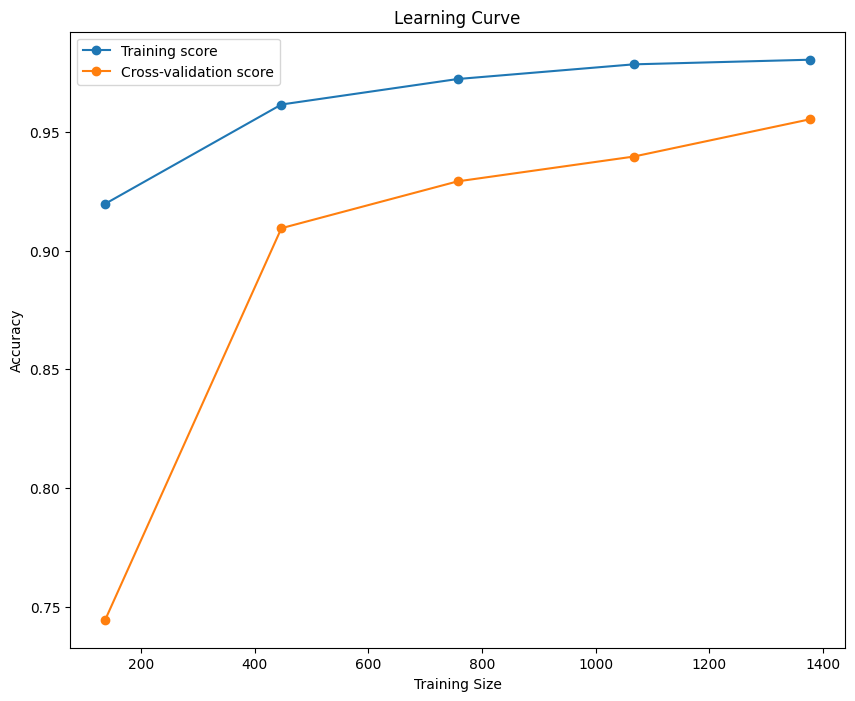

In [86]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve( final_rf, X_train_selected_rf, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


#### Roc Curve for the final model of Random Forest

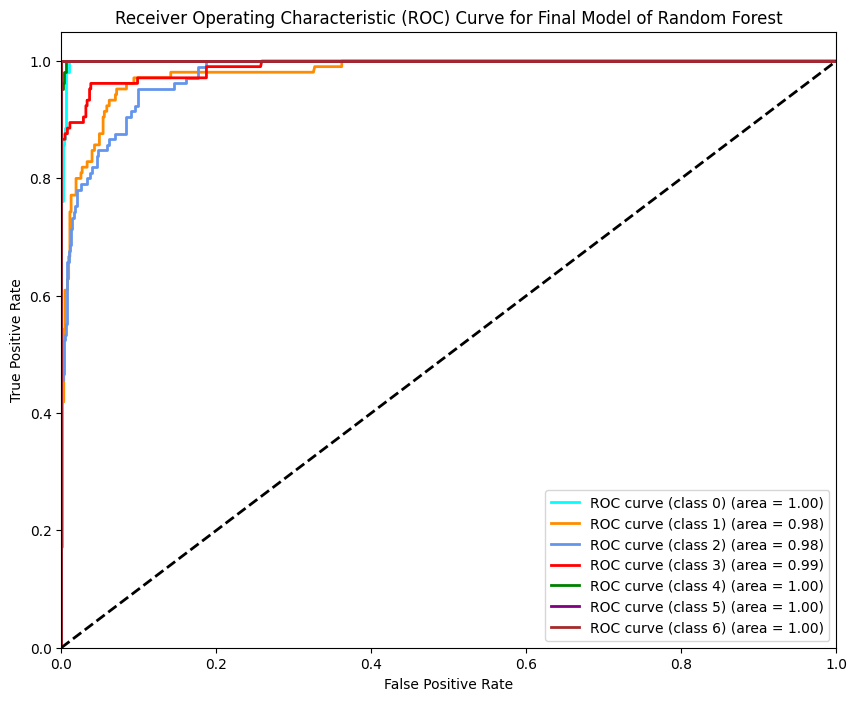

In [87]:
n_classes = 7 

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])


roc_final_model = OneVsRestClassifier(final_rf)
roc_final_model.fit(X_train_selected_rf, y_train_binarized)

y_score_final = roc_final_model.predict_proba(X_test_selected_rf)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model of Random Forest')
plt.legend(loc='lower right')
plt.show()

#### Tree Diagram for Random Forest

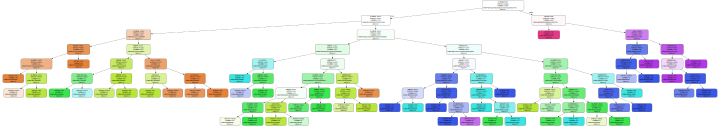

In [88]:
dot_data = export_graphviz(final_rf.estimators_[5], 
                           out_file=None, 
                           feature_names=top_features_rf,  # Use selected feature names
                           class_names=[f'{i}' for i in range(7)],  # Assuming class labels from 0 to 6
                           filled=True, 
                           rounded=True, 
                           special_characters=True)


dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\n  size="10,10!";')  
graph = graphviz.Source(dot_data)
display(graph)


##  Comparison Between Base Model Vs Final Random Forest Model

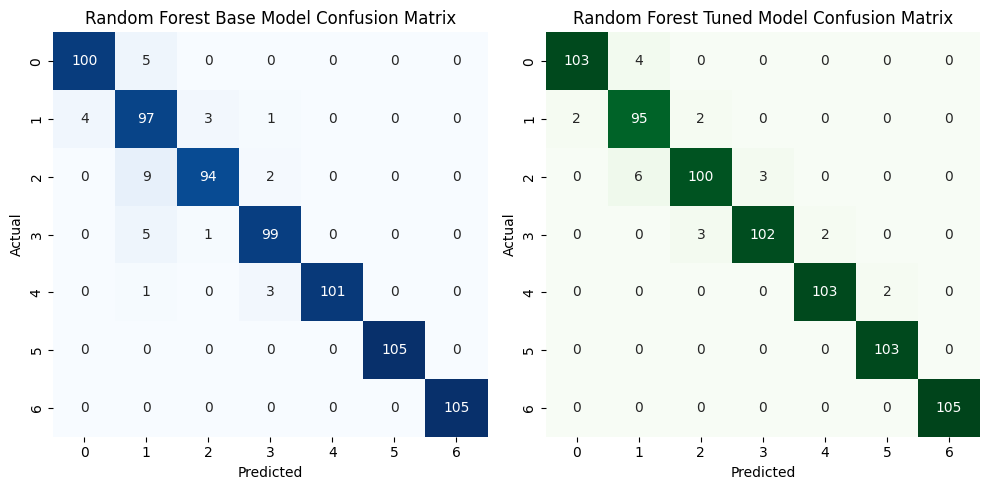

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# 3. Plotting the Confusion Matrix Heatmap for Base Model
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.heatmap(rf_base_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Base Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4. Plotting the Confusion Matrix Heatmap for Tuned Model
plt.subplot(1, 2, 2)  # Second subplot
sns.heatmap(rf_final_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Tuned Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# 6) Saving Best Model In Pickle file

In [90]:
import pickle

model = final_rf

# Save the model as a pickle file
with open('final_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


# 7) Creating Website for Final Classification Model

In [91]:
import gradio as gr
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler 

# Load your trained model and the fitted scaler
model = final_rf  # Ensure this is your trained model
scaler = StandardScaler()  # Replace with the actual filename of your fitted scaler

# Mapping of numeric predictions to class labels
class_labels = {
    0: 'Insufficient Weight',
    1: 'Normal Weight',
    2: 'Overweight Level I',
    3: 'Overweight Level II',
    4: 'Obesity Type I',
    5: 'Obesity Type II',
    6: 'Obesity Type III'
}

# Function to make predictions
def predict_obesity(weight, height, age, fcvc, gender, ncp, ch2o, faf, tue, fhwow,
                    caec_sometimes, calc_no, calc_sometimes, caec_frequently,
                    alcohol_choice, mtrans_choice, favc):
    
    # Prepare input data for prediction
    input_data = np.array([[weight, height, age, fcvc, 1 if gender == "Male" else 0, ncp, ch2o, faf, tue, fhwow,
                             1 if caec_sometimes else 0, 1 if calc_no else 0, 1 if calc_sometimes else 0,
                             1 if caec_frequently else 0, 1 if alcohol_choice == "Yes" else 0,
                             1 if favc else 0, 1 if mtrans_choice == "Automobile" else 0]])

    # Scale the appropriate input values
    input_data[:, 0:4] = scaler.fit_transform(input_data[:, 0:4])  
    input_data[:, 5:10] = scaler.fit_transform(input_data[:, 5:10])  

    # Make prediction
    prediction = model.predict(input_data)

    # Map the numeric prediction to the corresponding label
    predicted_label = class_labels.get(prediction[0], "Unknown Class")
    return predicted_label

# Custom CSS for better styling
custom_css = """
<style>
    .gradio-container {
        background-color: #0a0a2c;
        background-image: 
            linear-gradient(45deg, #0a0a2c 25%, #12124a 25%, #12124a 50%, #0a0a2c 50%, #0a0a2c 75%, #12124a 75%, #12124a 100%);
        background-size: 56.57px 56.57px;
        border-radius: 15px;
        padding: 30px;
        box-shadow: 0 0 20px rgba(66, 220, 219, 0.3),
                    0 0 40px rgba(233, 30, 99, 0.2);
        border: 1px solid rgba(66, 220, 219, 0.3);
    }

    .title {
        font-family: 'Orbitron', sans-serif;
        font-size: 36px;
        font-weight: bold;
        color: #00fff2;
        text-align: center;
        margin-bottom: 30px;
        text-transform: uppercase;
        letter-spacing: 3px;
        text-shadow: 0 0 10px rgba(0, 255, 242, 0.5),
                     0 0 20px rgba(0, 255, 242, 0.3),
                     0 0 30px rgba(0, 255, 242, 0.1);
    }

    .description {
        font-family: 'Rajdhani', sans-serif;
        font-size: 18px;
        color: #b4f8fc;
        text-align: center;
        margin-bottom: 30px;
        line-height: 1.6;
        text-shadow: 0 0 5px rgba(180, 248, 252, 0.3);
    }

    /* Input fields styling */
    input[type="number"] {
        background-color: rgba(16, 16, 44, 0.9);
        border: 2px solid #00fff2;
        border-radius: 8px;
        padding: 12px;
        color: #fff;
        font-family: 'Rajdhani', sans-serif;
        transition: all 0.3s ease;
        box-shadow: 0 0 10px rgba(0, 255, 242, 0.2);
    }

    input[type="number"]:focus {
        border-color: #ff2e63;
        box-shadow: 0 0 15px rgba(255, 46, 99, 0.4);
        outline: none;
    }

    /* Radio and Checkbox styling */
    input[type="radio"],
    input[type="checkbox"] {
        accent-color: #ff2e63;
    }

    .input-container label {
        color: #b4f8fc;
        font-family: 'Rajdhani', sans-serif;
        font-size: 16px;
        margin-bottom: 8px;
        display: block;
    }

    /* Button styling */
    button {
        background: linear-gradient(45deg, #ff2e63, #00fff2);
        color: #fff;
        border: none;
        padding: 15px 30px;
        border-radius: 8px;
        cursor: pointer;
        font-family: 'Orbitron', sans-serif;
        font-size: 18px;
        text-transform: uppercase;
        letter-spacing: 2px;
        transition: all 0.3s ease;
        box-shadow: 0 0 15px rgba(255, 46, 99, 0.3),
                    0 0 30px rgba(0, 255, 242, 0.2);
    }

    button:hover {
        transform: translateY(-2px);
        box-shadow: 0 0 20px rgba(255, 46, 99, 0.5),
                    0 0 40px rgba(0, 255, 242, 0.3);
    }

    /* Output label styling */
    .output-label {
        background: rgba(16, 16, 44, 0.9);
        border: 2px solid #ff2e63;
        border-radius: 8px;
        padding: 20px;
        color: #00fff2;
        font-family: 'Orbitron', sans-serif;
        font-size: 24px;
        text-align: center;
        margin-top: 20px;
        box-shadow: 0 0 15px rgba(255, 46, 99, 0.3);
    }

    /* Add cyberpunk grid lines to the background */
    .gradio-container::before {
        content: '';
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: 
            linear-gradient(90deg, rgba(66, 220, 219, 0.1) 1px, transparent 1px),
            linear-gradient(0deg, rgba(66, 220, 219, 0.1) 1px, transparent 1px);
        background-size: 20px 20px;
        pointer-events: none;
    }

    /* Add some hover effects to input containers */
    .input-container:hover {
        transform: translateX(5px);
        transition: transform 0.3s ease;
    }

    /* Scrollbar styling */
    ::-webkit-scrollbar {
        width: 10px;
        background: #0a0a2c;
    }

    ::-webkit-scrollbar-thumb {
        background: linear-gradient(45deg, #ff2e63, #00fff2);
        border-radius: 5px;
    }
</style>
"""

# Gradio interface
iface = gr.Interface(
    fn=predict_obesity,
    inputs=[
        gr.Number(label="Weight (40-160 kg)"),
        gr.Number(label="Height (1-2 m)"),
        gr.Number(label="Age (10-60 years)"),
        gr.Number(label="FCVC (Frequency of Vegetable Consumption 1-4)"),
        gr.Radio(choices=["Male", "Female"], label="Gender"),
        gr.Number(label="NCP (Number of meals per day 1-3)"),
        gr.Number(label="CH2O (Water Consumption 1-3)"),
        gr.Number(label="FAF (Physical Activity Frequency 1-4)"),
        gr.Number(label="TUE (Time Spent on Exercise 1-4)"),
        gr.Number(label="FHWOW (Family History with OverWeight)"),
        gr.Radio(choices=["No", "Sometimes", "Frequently"], label="Alcohol Consumption"),
        gr.Radio(choices=["Public Transportation", "Automobile"], label="Transportation Method"),
        gr.Checkbox(label="FAVC (Frequent Consumption of High-Calorie Foods)"),
    ],
    outputs=gr.Label(label="Predicted Obesity Level"),
    title="Obesity Level Estimator",
    description="Enter the features related to eating habits and physical condition to estimate obesity levels.",
    css=custom_css
)

# Launch the interface
iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://938ea7af036a214e6e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
